# **Proyecto: Score de Riesgo - Telecom**
##  Metodología seguida para el desarrollo del modelo 

<br></br>

## **1. Objetivo del proyecto**
* **Contexto y Problema Comercial**: La compañía brinda ciertos servicios financiados, los cuales cuentan con un riesgo asociado a la falta del pago por parte de los clientes. Contar con una probabilidad de morosidad para cada cliente puede ser una herramienta de mucha utilidad para tomar decisiones de crédito. 
<br>


* **Objetivo:** Desarrollar un modelo de clasificación que permita identificar a los clientes con mayor probabilidad de ingresar en mora.  
<br>

* **Contexto Analítico:** Para generar el modelo predictivo se otorgó una muestra con **8.047** registros y **104** columnas, de las cuales una se denomina "target" y contiene la variable objetivo del problema. Esta variable indica un 1 si el cliente resultó moroso, y un 0 en otro caso.  
<br></br>

## **2. Preprocesamiento, EDA y selección de predictores** 
* **Preprocesamiento:** Implica identificar y seguir ciertas estrategias ante la detección de valores vacíos, outliers o atípicos. En cada caso se dejará asentado cuál fue el mecanismo para detectar estos potenciales problemas en la data, y qué decisión se tomará al respecto. 
<br>

* **EDA:** Consiste en analizar y evaluar los posibles patrones de comportamiento detectados entre features, fundamentalmente en relación con la variable objetivo. Se parte de ciertas hipótesis, las cuales serán evaluadas a través de visualizaciones o métricas que permitan responder a preguntas que dan orígen al análisis, para detectar potenciales features con una fuerte relación con el target. 
<br>

* **Selección de Predictores:** Para definir qué variables cuentan con mayor relación con el target, se utilizará la "Imprtancia de variables" que surge de utilizar el algoritmo de Random Forest. Con dicho algoritmo podemos acceder a una métrica calculada por éste, llamada importancia, que sirve para determinar la contribución relativa de cada característica en la precisión de las predicciones del modelo. Es importante considerar que para utilizar este algoritmo es necesario que todos los features sean de tipo numérico, por lo que, si existen variables de tipo categórico hay que considerar alguna técnica de encoding previo a utilizar el algoritmo (one hot encoding, label encoding, target encoding).
<br></br>

## **3. Elección de algoritmo** 
* **Separación en Train y Test:** Previo a generar algún modelo, se separará a la muestra en dos partes, de manera completamente aleatoria, a los efectos de dejar contemplado aproximadamente un **30%** del total de los registros en la muestra de testeo, y un **70%** en la muestra de entrenamiento.
<br></br> 

* **Algoritmos a probar:** Antes de tomar la decisión sobre qué algoritmo es el más apropiado, se compararán los resultados de dos tipos de modelos: 
<br></br>

    **3.1. Regresión logística** 
<br>

    **3.2. Random Forest** 
<br></br>

## **4. Validación de los Modelos** 
* Para elegir criteriosamente al modelo ganador se evaluarán de manera conjunta las siguientes métricas, acompañadas por sus correspondientes análisis visuales para facilitar la toma de decisiones: 
<br></br>

   **4.1. Matriz de Confusión:** El umbral de predicción será de 0.5.  
<br>

   **4.2. Recall:** Dado que se trata de una muestra muy desbalanceada en cuanto al target, se buscará optimizar esta métrica.
<br>  

   **4.3. Accurancy:** Se evaluará esta métrica en manera conjunta con el Recall.
<br>  
    
   **4.4. Curva ROC y AUC:** Cuanto mayor AUC, mejor modelo.    

    

<br></br>

## **5. Prueba de estrés al modelo ganador**
* Para asegurarse de la robustez del modelo ganador, se lo someterá a ciertas pruebas de estrés utilizando: 
<br>

   **5.1. Bootstrapping:**  Consiste en un análisis de Bootstrapping que genere distribuciones de métricas relevantes, seleccionando submuestras aleatorias de la muestra de testeo, para asegurar estabilidad y confianza en los resultados del modelo.  
   <br>

   **5.2. K-Folds Validation:**  Se evaluará que no existan problemas de Bias y Varianza evaluando principales métricas en cada grupo k de validación.  

<br></br>

## **6. Próximos pasos**
* Se deben intentar responder las siguientes preguntas: 
<br></br>

    - ¿Qué modelo obtiene mejor poder predictivo? 
    - ¿Responde a las necesidades del negocio?     
    - ¿Cuenta con un balance apropiado entre complejidad, capacidad de generalización, y facilidad de implementación? 
    - ¿Cómo voy a entregar los resultados de las predicciones en el futuro? 

<br></br>


# **1. Objetivo del proyecto**
En esta etapa se importará el dataset disponible para trabajar, se presentarán las definiciones correspondientes para entender cada uno de los datos que se estudiarán, y se mostrará la estructura final con la que se trabajará. 
<br>
Finalmente, se mostrará la distribución de la variable target para entender el punto de partida del problema.
<br></br>

In [412]:
# Librerias
import pandas as pd
import numpy as np
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)
# Saco los warnings
import warnings
warnings.filterwarnings("ignore")

# Importación del dataset
url = 'https://raw.githubusercontent.com/xlisouski/Proyectos_DS/main/Desafio_Telecom/Base_Evaluacion.xlsx'

# Primero exploro qué pestañas existen
nombres_hojas = pd.ExcelFile(url).sheet_names
print("Nombres de las pestañas:", nombres_hojas)


Nombres de las pestañas: ['Base', 'Diccionario']


In [413]:
# Importo el dataset
df = pd.read_excel(url, sheet_name='Base')

# Importo el diccionario
diccionario = pd.read_excel(url, sheet_name='Diccionario')

## Diccionario de variables 

In [414]:
diccionario.head(15)

,DESCRIPCION CDA WEB,DESCRIPCION CDA BATCH,TIPO,LONGTUD MAX
0,ID_Telecom (No incluir en Web),GT_ID,Entero,11
1,Nro_Documento (No incluir en Web),GT_DOC_NRO,Documento,11
2,Titular (No incluir en Web),GT_TITULAR,Texto,350
3,Genero (No incluir en Web),GT_GENERO,Texto,1
4,Tipo Documento,DOC_TIPO,Texto,4
5,Nro. Documento,DOC_NRO,Documento,11
6,Nombre,NOMBRE,Texto,180
7,Apellido,APELLIDO,Texto,180
8,Razón Social,R_SOCIAL,Texto,120
9,% Calidad Nombre,CAL_NOM_AFIP,Porcentaje,3


## Estructura del dataset

In [415]:
df.head()

,ID,cal_nom_afip,edad,lc_monto,lc_monto_c,sco_ser,sco_ser_3m,sco_ser_6m,sco_ser_12m,sco_ser_3m_t,...,aper_cant_imp_3m,aper_cant_imp_12m,aper_cant_parc_12m,art_fpgo,sss_os_cod,bs_posee,com_ext_imp,com_ext_exp,ft_apocrifas,target
0,1,100,37,28078,6187,275,275,246,229,0,...,0,0,0,0,111209,0,0,0,0,0
1,2,0,22,24268,8437,204,198,253,142,0,...,0,0,0,0,0,0,0,0,0,1
2,3,100,44,169296,53144,873,892,993,959,0,...,0,0,0,0,0,1,0,0,0,0
3,4,100,32,47394,5468,464,438,429,554,0,...,0,0,0,0,119302,0,0,0,0,0
4,5,100,63,647073,134891,999,955,999,999,0,...,0,0,0,0,0,1,0,0,0,0


In [416]:
# Cantidad de filas y columnas importadas
print('Cantidad de filas: ', df.shape[0])
print('Cantidad de columnas: ', df.shape[1])

Cantidad de filas:  8047
Cantidad de columnas:  104


In [417]:
# Tipos de datos disponibles 
tipos_de_datos = df.dtypes
print("Tipos de datos por columna:")
print('')
print(tipos_de_datos)

Tipos de datos por columna:

ID              int64
cal_nom_afip    int64
edad            int64
lc_monto        int64
lc_monto_c      int64
                ...  
bs_posee        int64
com_ext_imp     int64
com_ext_exp     int64
ft_apocrifas    int64
target          int64
Length: 104, dtype: object


In [418]:
# ¿Cómo se componen los features?
print('Distribución de tipos de datos:')
df.dtypes.value_counts()

Distribución de tipos de datos:


int64      103
float64      1
dtype: int64

## Variable Target
Como ya se describió inicialmente, la variable target indica un 1 si el cliente resultó moroso, y un 0 en otro caso. Por ello, antes de iniciar con el análisis exploratorio de datos, es indispensable tomar conocimiento sobre la distribución de esta variable en toda la muestra, ya que será el punto de partida del proyecto. 

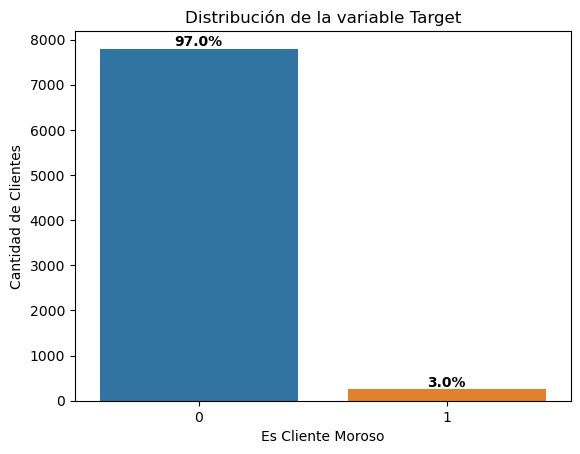

In [419]:
# Librerías involucradas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Analicemos la distribución de nuestra variable target
cantidad = len(df['target'])

sns.countplot(data = df,
              x = "target")
plt.xlabel('Es Cliente Moroso')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de la variable Target')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0 
    y_text = p.get_height() 
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', 
            ha = 'center', 
            va = 'bottom',  
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()


### **Conclusiones:** 
* Todas las variables disponibles son de tipo numéricas, por lo que no resulta necesario utilizar técnicas de encoding previo a seleccionar el subconjunto de variables con mayor poder predictivo. 
* Únicamente un **3%** del total de clientes resultó ser moroso. 
* Existe una gran disparidad en el número de observaciones entre las dos posibles categorías, por lo que se trata de una variable objetivp **desbalanceada**.  Esto se debe considerar al momento de seleccionar el modelo de aprendizaje automático más adecuado, y al evaluar las métricas de evaluación. 

# **2. Preprocesamiento, selección de predictores y EDA** 
## **2.1. Preprocesamiento:**
<br>
Esta etapa consiste en eliminar del análisis aquellos datos que no son de utilidad para el desarrollo de un modelo predictivo, evaluar la calidad de los datos, detectar nulos, outliers y valores atípicos y aplicar una estrategia adecuada en cada caso.

### **2.1.1. Descarte de variables no útiles para modelar**
No todas las variables disponibilizadas en el dataset tienen la capacidad de ser consideradas features para que formen parte de un modelo predictivo. Por ello, a continuación, se enlistarán aquellos campos que NO se tendrán en cuenta en el análisis porque su naturaleza impide que sirvan para calcular features que puedan generalizar patrones y tendencias de comportamiento. 

In [420]:
# Identifico variables a descartar del análisis (códigos, id, información individual)
campos_eliminar = ['ID', 'cal_nom_afip']

# Los elimino 
df = df.drop(campos_eliminar, axis = 1)

### **2.1.2. Análisis de variables con muy poca variabilidad**
Se identificarán aquellos campos con valores con muy poca variablilidad para excluirlos del análsis. Se considera que un campo cuenta con poca variabilidad si al menos el 99% de sus valores son iguales.  

In [421]:
# Identificación de variables poca variablidad
umbral_porcentaje = 99

# Lista para almacenar las variables que cumplen el criterio
variables_pocavar = []

# Iterar sobre cada columna
for columna in df.columns:
    # Calcular la frecuencia de cada categoría
    frecuencia_categorias = df[columna].value_counts(normalize=True) * 100
    
    # Verificar si se cumple con el umbral exigido
    if frecuencia_categorias.max() > umbral_porcentaje:
        variables_pocavar.append(columna)

# Imprimir la lista de variables que cumplen el criterio
print("Variables con poca variabilidad:")
print('')
variables_pocavar

Variables con poca variabilidad:



['telcos_dda_mv',
 'telcos_dda_tf',
 'fe',
 'fe_max',
 'pfina_12m',
 'bancrzdo',
 'che_sf_cant_3m',
 'che_sf_mto_3m',
 'che_sf_cant_6m',
 'che_sf_mto_6m',
 'rc_vg_fcap2',
 'rc_vg_fcap3',
 'rc_vg_otras',
 'rf_vg_6m',
 'rf_vg_3m',
 'rf_vg',
 'rf_vg_fcap1',
 'rf_vg_fcap2',
 'rf_vg_fcap3',
 'rc_vg_telcos',
 'es_empleador',
 'es_integ_soc',
 'cant_empleados',
 'cod_ganancias',
 'aper_psit',
 'aper_cant_imp_3m',
 'aper_cant_imp_12m',
 'aper_cant_parc_12m',
 'art_fpgo',
 'com_ext_imp',
 'com_ext_exp',
 'ft_apocrifas']

In [422]:
# Un ejemplo: 
print('Ejemplo: variable telcos_dda_tf')
print('')
print('De 8047 filas, 8015 tienen el valor 0.')
print('Esto representa más del 99%, por lo que esa variable se excluirá del análisis')
print('')
print('Conteo:')
df['telcos_dda_tf'].value_counts()

Ejemplo: variable telcos_dda_tf

De 8047 filas, 8015 tienen el valor 0.
Esto representa más del 99%, por lo que esa variable se excluirá del análisis

Conteo:


0        8015
19205       1
9597        1
5966        1
13169       1
5647        1
4236        1
9259        1
14135       1
2505        1
4812        1
3869        1
43348       1
29893       1
1451        1
398         1
27215       1
2208        1
38648       1
2738        1
21044       1
17102       1
1224        1
15942       1
3174        1
4265        1
640         1
926         1
6678        1
5230        1
6842        1
3927        1
25325       1
Name: telcos_dda_tf, dtype: int64

In [423]:
# Elimino los campos detectados 
df = df.drop(variables_pocavar, axis = 1)

### **2.1.3. Análisis de nulos**
Se identificarán aquellos campos con valores vacíos. En caso de que existan, entonces se definirá una estrategia para su correcto tratamiento en función al motivo por el cual el dato se encuentra ausente. 

In [424]:
# Identificación de columnas con valores vacíos
vacios = df.isnull().sum()
print(vacios[vacios > 0])
print('No hay columnas con valores vacíos')

Series([], dtype: int64)
No hay columnas con valores vacíos


### **2.1.4. Feature Engineering**
Se calcularán algunas variables binarias para identificar qué personas usan cada tipo de producto financiero. 

In [425]:
# Identificación variables monetarias
diccionario.loc[diccionario['TIPO'] == 'Moneda']

,DESCRIPCION CDA WEB,DESCRIPCION CDA BATCH,TIPO,LONGTUD MAX
20,Monto Límite,LC_MONTO,Moneda,20
21,Monto Límite Cuota,LC_MONTO_C,Moneda,20
38,Telcos Morosas - Deuda Total,TELCOS_MOR_DDA,Moneda,20
41,Deuda Total - Movistar,TELCOS_DDA_MV,Moneda,20
42,Deuda Total - Telefónica,TELCOS_DDA_TF,Moneda,20
43,Deuda Total - Claro,TELCOS_DDA_CL,Moneda,20
44,Deuda Total - Personal,TELCOS_DDA_TP,Moneda,20
45,Deuda Total - Telecom,TELCOS_DDA_TA,Moneda,20
50,Compromisos Mensuales,COMPR_MENS,Moneda,20
63,Bancos Endeudamiento Vigente,BCO_ENDEU,Moneda,20


In [426]:
# Identificación variables monetarias
var_monetarias = diccionario['DESCRIPCION CDA BATCH'].loc[diccionario['TIPO'] == 'Moneda']
var_monetarias = [var.lower() for var in var_monetarias]
var_monetarias_f = df.columns[df.columns.isin(var_monetarias) == True]
var_monetarias_f

Index(['lc_monto', 'lc_monto_c', 'telcos_mor_dda', 'telcos_dda_cl',
       'telcos_dda_tp', 'telcos_dda_ta', 'compr_mens', 'bco_endeu', 'tc_sdot',
       'pre_pre_sldo', 'pre_hip_sldo', 'pre_per_sldo', 'pre_otr_sldo'],
      dtype='object')

In [427]:
# lc_monto: problema, tiene valores negativos
df['lc_monto'].describe()

count       8047.00
mean      111923.82
std       101243.94
min     -3152413.00
25%        39973.50
50%        97215.00
75%       152588.00
max       724422.00
Name: lc_monto, dtype: float64

In [428]:
# lc_monto corrección 
df['lc_monto'] = np.where(df['lc_monto']<0,0,df['lc_monto'])
df['lc_monto'].describe()

count     8047.00
mean    113341.04
std      92201.02
min          0.00
25%      39973.50
50%      97215.00
75%     152588.00
max     724422.00
Name: lc_monto, dtype: float64

In [429]:
# Binaria: tienen crédito con garantia
df['bin_garantia'] = np.where(df['pre_hip_sldo'] + df['pre_pre_sldo'] > 0,1,0)

perf = df.groupby('bin_garantia').agg(     
    Cant = ('bin_garantia', 'count'),           
    Tasa_Morosos = ('target', 'mean')    
).reset_index()

perf

,bin_garantia,Cant,Tasa_Morosos
0,0,7838,0.03
1,1,209,0.00


In [430]:
# Binaria: tienen crédito personal
df['bin_personal'] = np.where(df['pre_per_sldo'] > 0,1,0)

perf = df.groupby('bin_personal').agg(     
    Cant = ('bin_personal', 'count'),           
    Tasa_Morosos = ('target', 'mean')    
).reset_index()

perf

,bin_personal,Cant,Tasa_Morosos
0,0,6441,0.03
1,1,1606,0.04


In [431]:
# Binaria: usa TC
df['bin_tc'] = np.where(df['tc_sdot'] > 0,1,0)

perf = df.groupby('bin_tc').agg(     
    Cant = ('bin_tc', 'count'),           
    Tasa_Morosos = ('target', 'mean')    
).reset_index()

perf

,bin_tc,Cant,Tasa_Morosos
0,0,6072,0.03
1,1,1975,0.03


In [432]:
# Binaria: usa TC
df['bin_telcos_mor_dda'] = np.where(df['telcos_mor_dda'] > 0,1,0)

perf = df.groupby('bin_telcos_mor_dda').agg(     
    Cant = ('bin_telcos_mor_dda', 'count'),           
    Tasa_Morosos = ('target', 'mean')    
).reset_index()

perf

,bin_telcos_mor_dda,Cant,Tasa_Morosos
0,0,7609,0.03
1,1,438,0.06


### Escalando variables monetarias 
El hecho de escalar las variables monetarias lo que genera es que se centren los valores respecto al promedio, por lo que vamos a estar capturando qué tan distante de los valores promedios se encuentra cada cliente. 
<br>

El tratamiento correcto para darle en el futuro es recalcular mes a mes el promedio y desvío estándar general, y aplicar la fórmula de escala utilizando los nuevos valores calculados. En caso de no contar con la muestra completa para recalcular los parámetros, se les puede hacer alguna especie de ajuste por inflación. 

In [433]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

X = df[var_monetarias_f].values

# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X = sc.fit_transform(X)

# Genero df
df_scaled = pd.DataFrame(data = X)
prefijo = "Scaled_"
df_scaled.columns = var_monetarias_f
df_scaled.add_prefix(prefijo)
df_scaled = df_scaled.add_prefix(prefijo)

df_scaled.head()

,Scaled_lc_monto,Scaled_lc_monto_c,Scaled_telcos_mor_dda,Scaled_telcos_dda_cl,Scaled_telcos_dda_tp,Scaled_telcos_dda_ta,Scaled_compr_mens,Scaled_bco_endeu,Scaled_tc_sdot,Scaled_pre_pre_sldo,Scaled_pre_hip_sldo,Scaled_pre_per_sldo,Scaled_pre_otr_sldo
0,-0.92,-0.29,-0.10,-0.07,-0.04,-0.10,-0.37,-0.30,0.44,-0.06,-0.07,-0.27,-0.13
1,-0.97,-0.25,-0.10,-0.07,-0.04,-0.10,-0.47,-0.30,-0.35,-0.06,-0.07,-0.27,-0.13
2,0.61,0.56,-0.10,-0.07,-0.04,-0.10,-0.30,-0.20,-0.35,-0.06,-0.07,-0.27,-0.13
3,-0.72,-0.30,-0.10,-0.07,-0.04,-0.10,-0.16,-0.18,-0.07,0.10,-0.07,-0.27,-0.13
4,5.79,2.04,-0.10,-0.07,-0.04,-0.10,2.08,1.20,-0.35,-0.06,-0.07,-0.27,-0.13


In [434]:
# Agrego variables escaladas
df = pd.concat([df,df_scaled],axis = 1)

In [435]:
# Elimino variables monetarias
df = df.drop(var_monetarias_f,axis = 1)

### **2.1.5. Tratamiento de outliers**
Dado que las variables monetarias ya se encuentran escaladas, se considerarán outliers aquellos valores que se encuentren en los extremos de una distribución normal estándar. En este caso, valores menores a -4 serán topeados en -4, y valores superiores a 4 serán topeados en 4. 
<br>


In [436]:
# Capturo variables escaladas
variables_Scaled = df[df.columns[df.columns.str.contains('Scaled', case=False)]].columns

# Las recorro y topeo 
for columna in variables_Scaled:
    df[columna] = np.where(df[columna] > 4, 4, df[columna])
    df[columna] = np.where(df[columna] < (-4), (-4), df[columna])
    

In [437]:
# Verifico: 
df['Scaled_lc_monto'].describe()

count   8047.00
mean      -0.00
std        0.98
min       -1.23
25%       -0.80
50%       -0.17
75%        0.43
max        4.00
Name: Scaled_lc_monto, dtype: float64

## **2.2. Selección de predictores:**
<br>
Se utilizará un algoritmo de Random Forest con parámetros controlados para evaluar el poder predictivo de cada feature respecto al target, y seleccionar únicamente a las más predictivas para continuar con el desarrollo. 
<br>

Para agilizar el análisis, se seleccionarán únicamente el **top 10** de las variables con mayor importancia. 

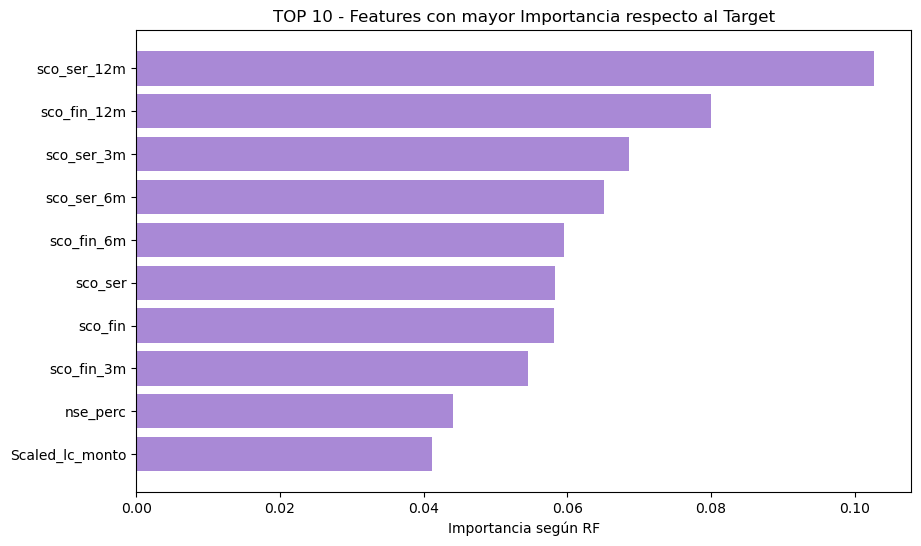

In [438]:
from sklearn.ensemble import RandomForestClassifier

features = df.drop('target', axis = 1).columns

X = df[features].values
y = df['target'].values

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators = 150, 
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 6,
                               criterion = 'entropy') 

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_completo = importance_df

# Grafico la importancia de cada variable
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
importance_df = importance_df.head(10)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(importance_df['Feature'], 
         importance_df['Importance'],
         color = '#A989D6')
plt.xlabel('Importancia según RF')
plt.title('TOP 10 - Features con mayor Importancia respecto al Target')
plt.gca().invert_yaxis()  
plt.show() 

## **2.3. EDA:**
<br>
En este apartado se presentará un análisis visual sobre la relación de cada una de las 10 features respecto al target.
<br>

Finalmente, se presentará un análisis conjunto para entender la correlación entre features.  

### **sco_ser_12m**
Se evidencia que los clientes morosos cuentan con un sco_ser_12m mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_ser_12m, menor probabilidad de ser un cliente moroso. 
<br>


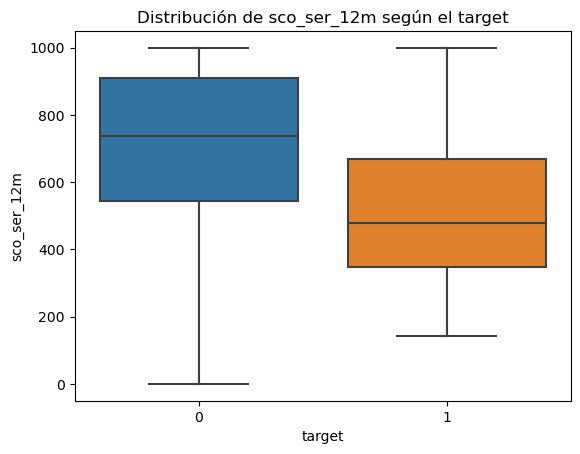

In [439]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_ser_12m', 
            showfliers = False)
plt.title('Distribución de sco_ser_12m según el target')
plt.show()

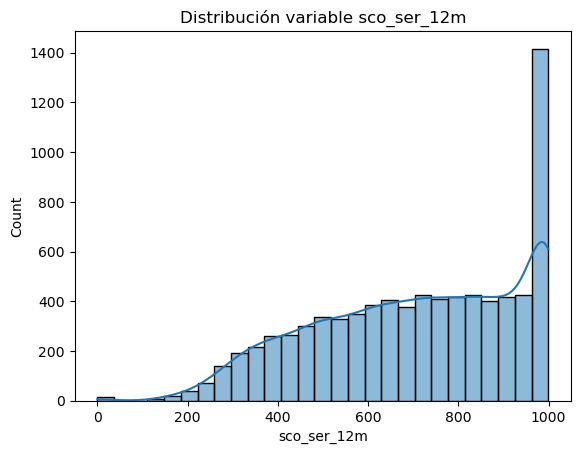

In [440]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_ser_12m', 
            kde=True)
plt.title('Distribución variable sco_ser_12m')
plt.show()

### **sco_fin_12m**
Se evidencia que los clientes morosos cuentan con un sco_fin_12m mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_fin_12m, menor probabilidad de ser un cliente moroso. 
<br>


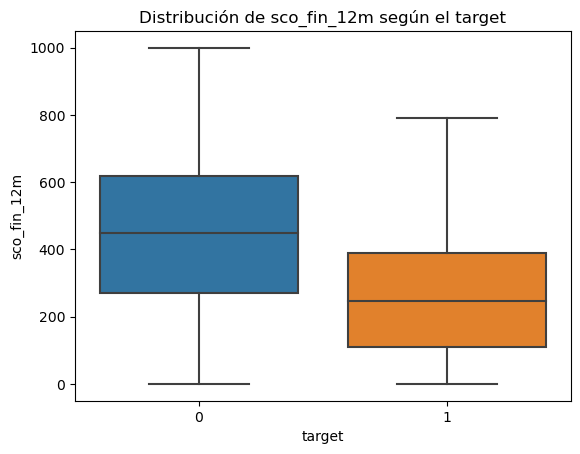

In [441]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_fin_12m', 
            showfliers = False)
plt.title('Distribución de sco_fin_12m según el target')
plt.show()

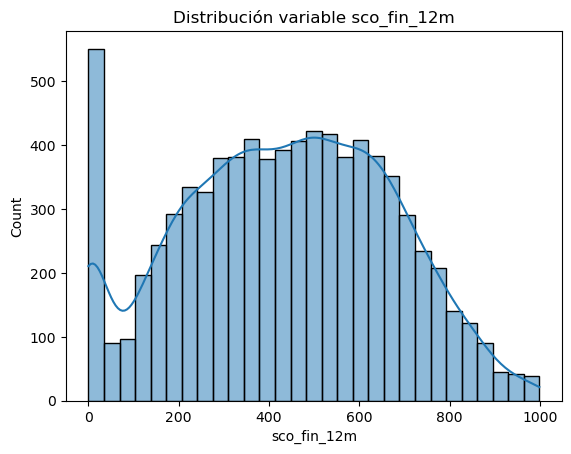

In [442]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_fin_12m', 
            kde=True)
plt.title('Distribución variable sco_fin_12m')
plt.show()

### **sco_ser_3m**
Se evidencia que los clientes morosos cuentan con un sco_ser_3m mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_ser_3m, menor probabilidad de ser un cliente moroso. 
<br>


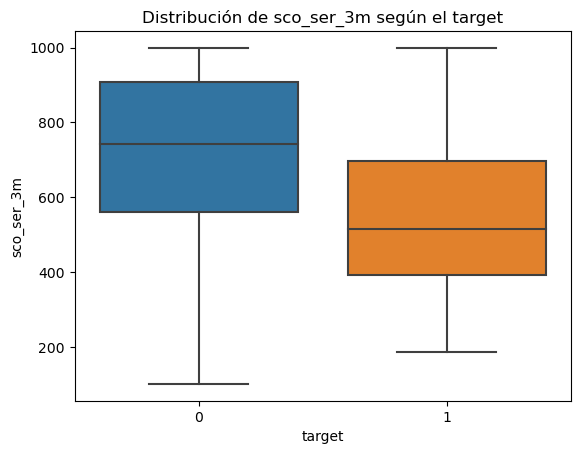

In [443]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_ser_3m', 
            showfliers = False)
plt.title('Distribución de sco_ser_3m según el target')
plt.show()

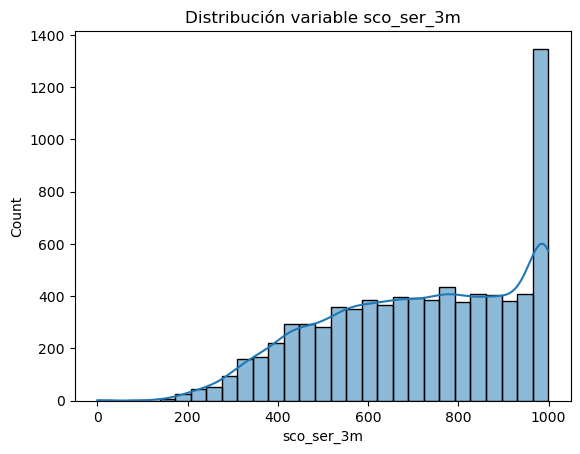

In [444]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_ser_3m', 
            kde=True)
plt.title('Distribución variable sco_ser_3m')
plt.show()

### **sco_ser_6m**
Se evidencia que los clientes morosos cuentan con un sco_ser_6m mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_ser_6m, menor probabilidad de ser un cliente moroso. 
<br>


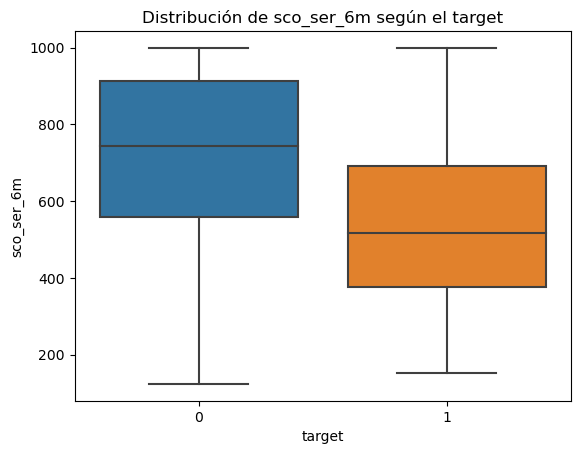

In [445]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_ser_6m', 
            showfliers = False)
plt.title('Distribución de sco_ser_6m según el target')
plt.show()

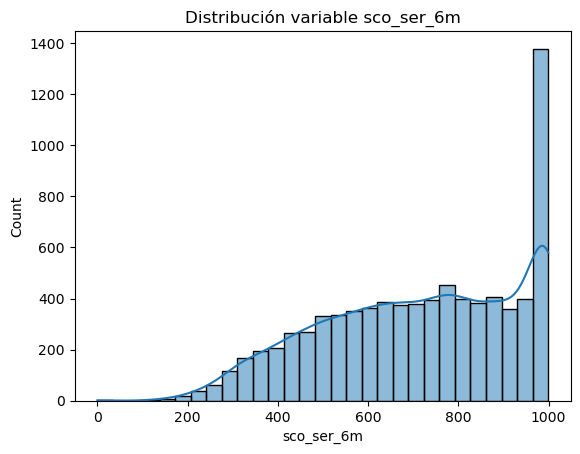

In [446]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_ser_6m', 
            kde=True)
plt.title('Distribución variable sco_ser_6m')
plt.show()

### **sco_fin_6m**
Se evidencia que los clientes morosos cuentan con un sco_fin_6m mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_fin_6m, menor probabilidad de ser un cliente moroso. 
<br>

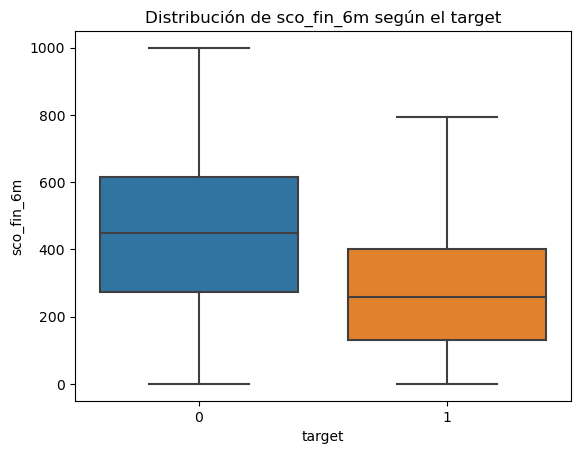

In [447]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_fin_6m', 
            showfliers = False)
plt.title('Distribución de sco_fin_6m según el target')
plt.show()

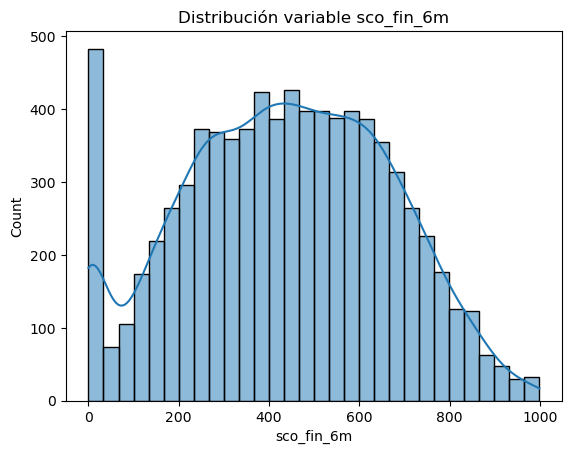

In [448]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_fin_6m', 
            kde=True)
plt.title('Distribución variable sco_fin_6m')
plt.show()

### **sco_ser**
Se evidencia que los clientes morosos cuentan con un sco_ser mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_ser, menor probabilidad de ser un cliente moroso. 
<br>

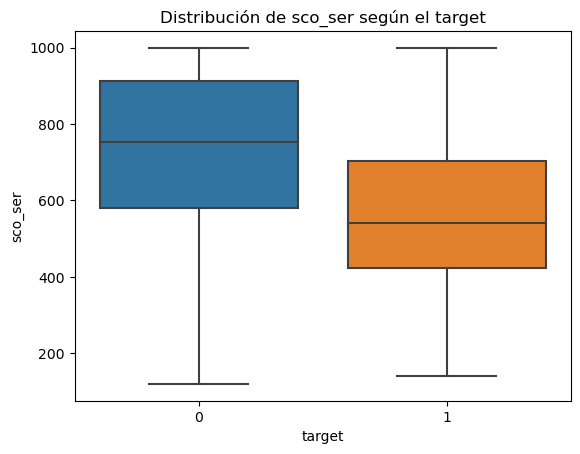

In [449]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_ser', 
            showfliers = False)
plt.title('Distribución de sco_ser según el target')
plt.show()

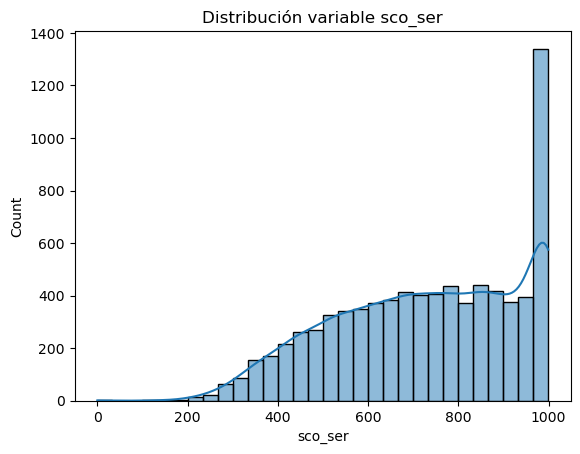

In [450]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_ser', 
            kde=True)
plt.title('Distribución variable sco_ser')
plt.show()

### **sco_fin**
Se evidencia que los clientes morosos cuentan con un sco_fin mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_fin, menor probabilidad de ser un cliente moroso. 
<br>

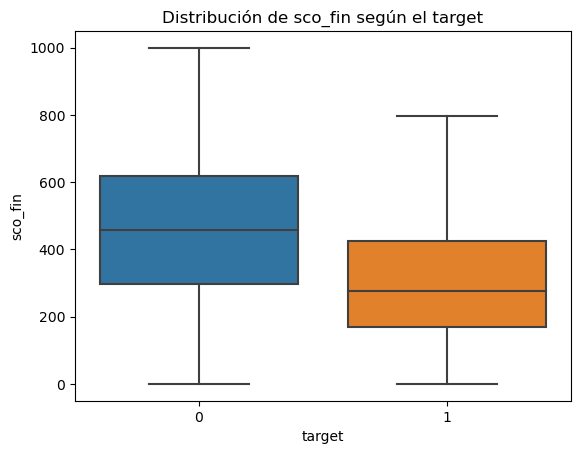

In [451]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_fin', 
            showfliers = False)
plt.title('Distribución de sco_fin según el target')
plt.show()

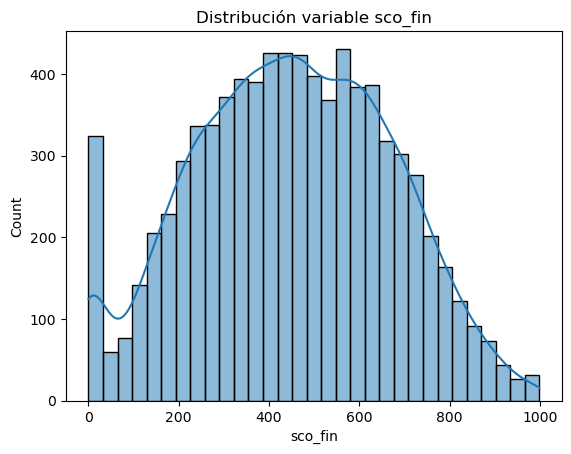

In [452]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_fin', 
            kde=True)
plt.title('Distribución variable sco_fin')
plt.show()

### **sco_fin_3m**
Se evidencia que los clientes morosos cuentan con un sco_fin_3m mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor sco_fin_3m, menor probabilidad de ser un cliente moroso. 
<br>

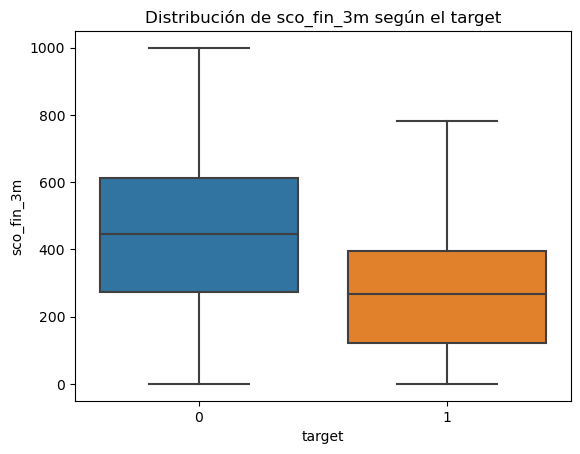

In [453]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'sco_fin_3m', 
            showfliers = False)
plt.title('Distribución de sco_fin_3m según el target')
plt.show()

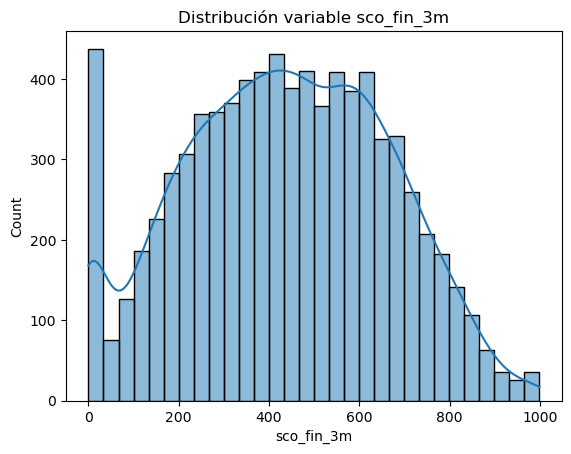

In [454]:
# Distribución 
sns.histplot(data = df,
            x = 'sco_fin_3m', 
            kde=True)
plt.title('Distribución variable sco_fin_3m')
plt.show()

### **nse_perc**
Se evidencia que los clientes morosos cuentan con un nse_perc mediano bastante más alto que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor nse_perc, mayor probabilidad de ser un cliente moroso. 
<br>

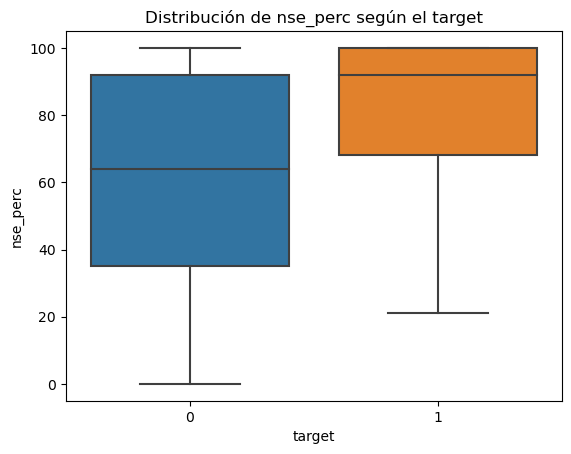

In [455]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'nse_perc', 
            showfliers = False)
plt.title('Distribución de nse_perc según el target')
plt.show()

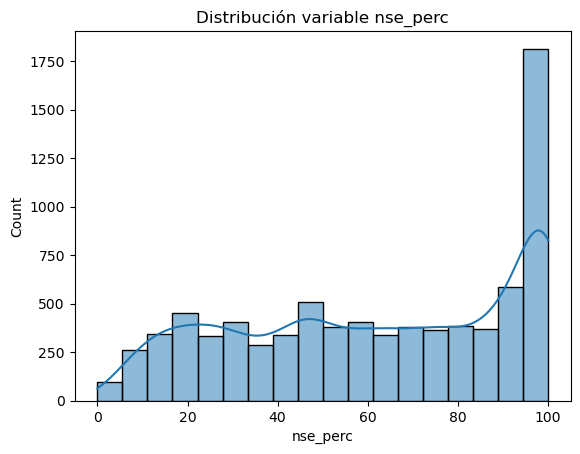

In [456]:
# Distribución 
sns.histplot(data = df,
            x = 'nse_perc', 
            kde=True)
plt.title('Distribución variable nse_perc')
plt.show()

### **Scaled_lc_monto**
Se evidencia que los clientes morosos cuentan con un Scaled_lc_monto mediano bastante más bajo que los clientes no morosos. 
<br>

**Tendencia Esperada:** A mayor Scaled_lc_monto, menor probabilidad de ser un cliente moroso. 
<br>

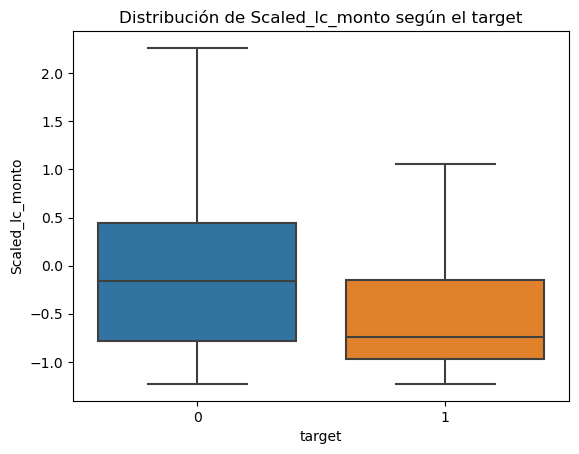

In [457]:
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'Scaled_lc_monto', 
            showfliers = False)
plt.title('Distribución de Scaled_lc_monto según el target')
plt.show()

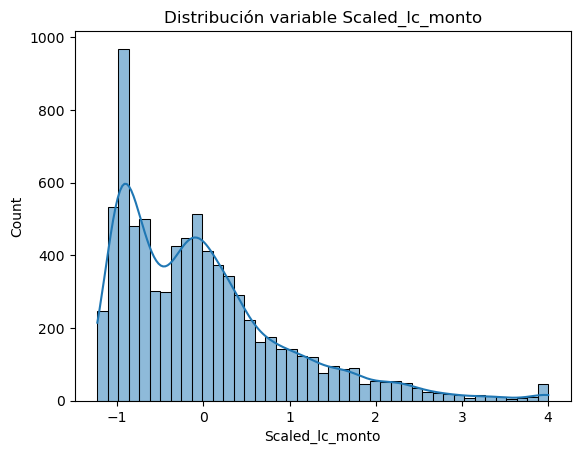

In [458]:
# Distribución 
sns.histplot(data = df,
            x = 'Scaled_lc_monto', 
            kde=True)
plt.title('Distribución variable Scaled_lc_monto')
plt.show()

### **Análisis Multivariado**
Se presenta el coeficiente de correlación lineal de aquellas variables que mostraron una importancia superior a 0.01.

<Axes: >

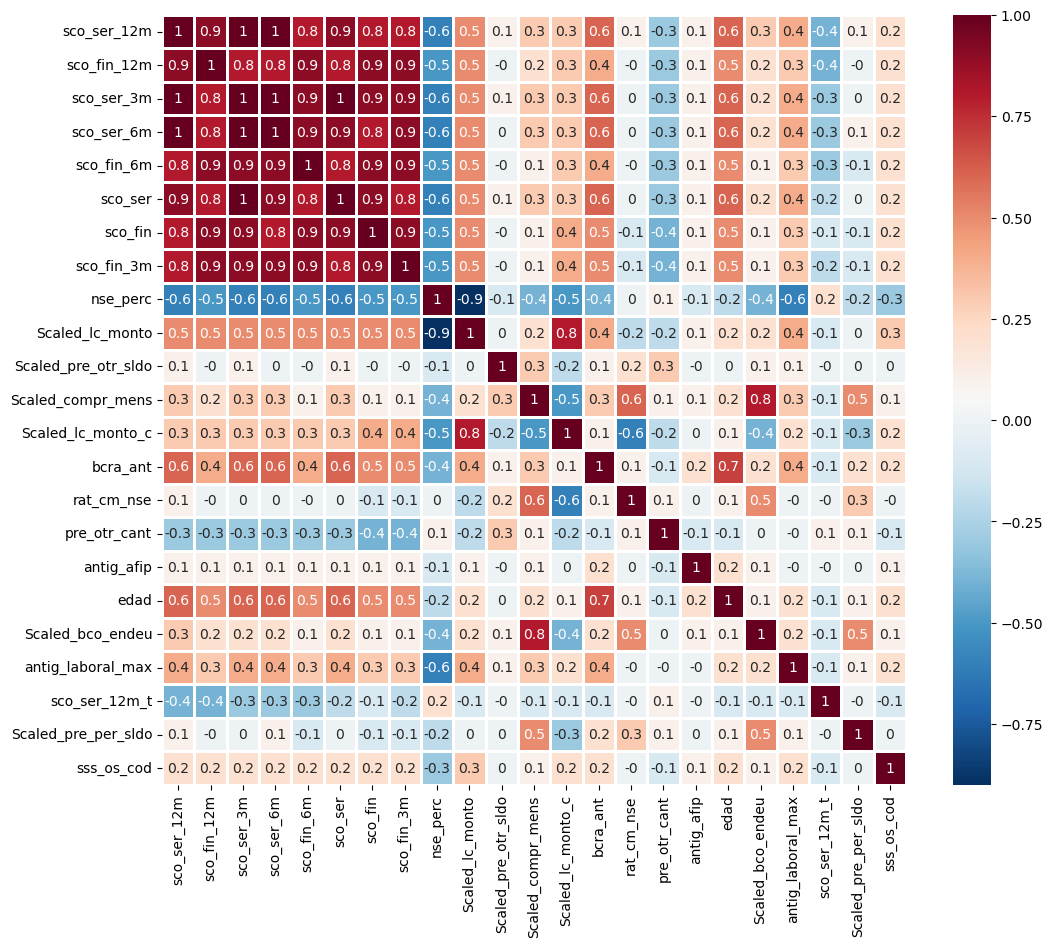

In [459]:
# Variables importantes 
features_imp = importance_completo['Feature'].loc[importance_completo['Importance'] > 0.01]

# Matriz de correlacion
matriz_corr = df[features_imp].corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(round(matriz_corr,1), annot=True,
            cmap = 'RdBu_r',            
            lw = 1)

### **Conclusiones**
* Todas las varaibles de tipo "sco_ser" tienen una distribución muy similar. Lo mismo se observa con las variables de tipo "sco_fin". 
<br>

* Si bien las variables de score son muy buenos predictores del target, se encuentran extremadamente correlacionadas entre sí (coeficientes por encima de 0.8). Involucrar en los algoritmos features con mucha correlación puede generar algunos inconvenientes en la captura de patrones de comportamiento, por lo que quizás sea conveniente seleccionar alguna de ellas o bien combinarlas de alguna manera. 
<br>

    **Propuesta:** Calcular PCA y utilizar únicamente el primer componente como feature. 
<br>

* La variable nse_perc tiene mucha concentración en los valores más alto. Asimismo, esta variable tiene una elevada correlación con lc_monto. Asimismo, lc_monto tiene mucha correlación con lc_monto_c.
<br>

    **Propuesta:** Calcular un árbol con las tres varaibles y utilizar la respuesta de dicho árbol como feature. 

### Feature Engineering v2: 
Se llevarán a cabo ambas propuestas sobre unificación de features para evitar problemas de correlación. 

**Variables tipo score** 

In [460]:
# Capturo variables tipo score, con alta correlación entre si 
variables_sco = df[df.columns[df.columns.str.contains('sco', case=False)]].columns
variables_sco

Index(['sco_ser', 'sco_ser_3m', 'sco_ser_6m', 'sco_ser_12m', 'sco_ser_3m_t',
       'sco_ser_6m_t', 'sco_ser_12m_t', 'sco_fin', 'sco_fin_3m', 'sco_fin_6m',
       'sco_fin_12m', 'sco_fin_3m_t', 'sco_fin_6m_t', 'sco_fin_12m_t'],
      dtype='object')

In [461]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

X = df[variables_sco].values

# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X = sc.fit_transform(X)

# Genero df
df_scaled = pd.DataFrame(data = X)
prefijo = "Scaled_"
df_scaled.columns = variables_sco
df_scaled.add_prefix(prefijo)
df_scaled = df_scaled.add_prefix(prefijo)

df_scaled.head()

,Scaled_sco_ser,Scaled_sco_ser_3m,Scaled_sco_ser_6m,Scaled_sco_ser_12m,Scaled_sco_ser_3m_t,Scaled_sco_ser_6m_t,Scaled_sco_ser_12m_t,Scaled_sco_fin,Scaled_sco_fin_3m,Scaled_sco_fin_6m,Scaled_sco_fin_12m,Scaled_sco_fin_3m_t,Scaled_sco_fin_6m_t,Scaled_sco_fin_12m_t
0,-2.24,-2.07,-2.19,-2.14,-0.24,-0.24,2.31,-2.05,-1.92,-1.91,-1.86,-0.23,-0.17,-0.16
1,-2.59,-2.44,-2.15,-2.53,-0.24,-0.24,2.31,-2.05,-1.92,-1.91,-1.86,-0.23,-0.17,-0.16
2,0.71,0.82,1.29,1.12,-0.24,-0.24,-0.30,0.83,0.96,1.36,0.99,-0.23,-0.17,-0.16
3,-1.31,-1.31,-1.34,-0.69,-0.24,-0.24,-0.30,-0.99,-0.92,-1.00,-0.43,-0.23,-0.17,-1.87
4,1.33,1.12,1.32,1.30,-0.24,-0.24,-0.30,1.78,1.18,1.61,1.73,-0.23,-0.17,-0.16


In [462]:
# Genero PCA
from sklearn.decomposition import PCA

# Genero PCA sin target
X_train = df_scaled.values

# Inicio el objeto PCA
pca = PCA()
PCA_train = pca.fit_transform(X_train)

# Almaceno en dataframe y presento
PCA_train = pd.DataFrame(data = PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)

# Me llevo los primeros dos componentes a los dataframes escalados
df_scaled['PC_0'] = PCA_train['PC_0']

df_scaled.head()

,Scaled_sco_ser,Scaled_sco_ser_3m,Scaled_sco_ser_6m,Scaled_sco_ser_12m,Scaled_sco_ser_3m_t,Scaled_sco_ser_6m_t,Scaled_sco_ser_12m_t,Scaled_sco_fin,Scaled_sco_fin_3m,Scaled_sco_fin_6m,Scaled_sco_fin_12m,Scaled_sco_fin_3m_t,Scaled_sco_fin_6m_t,Scaled_sco_fin_12m_t,PC_0
0,-2.24,-2.07,-2.19,-2.14,-0.24,-0.24,2.31,-2.05,-1.92,-1.91,-1.86,-0.23,-0.17,-0.16,5.71
1,-2.59,-2.44,-2.15,-2.53,-0.24,-0.24,2.31,-2.05,-1.92,-1.91,-1.86,-0.23,-0.17,-0.16,6.07
2,0.71,0.82,1.29,1.12,-0.24,-0.24,-0.30,0.83,0.96,1.36,0.99,-0.23,-0.17,-0.16,-2.90
3,-1.31,-1.31,-1.34,-0.69,-0.24,-0.24,-0.30,-0.99,-0.92,-1.00,-0.43,-0.23,-0.17,-1.87,2.34
4,1.33,1.12,1.32,1.30,-0.24,-0.24,-0.30,1.78,1.18,1.61,1.73,-0.23,-0.17,-0.16,-3.97


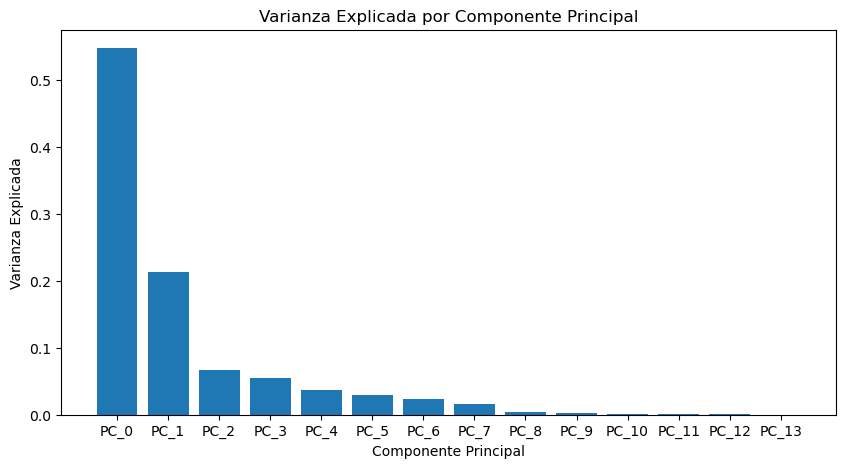

In [463]:
# Visualizo la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = PCA_train.columns

plt.figure(figsize= (10,5))
plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [464]:
# Llevo la variable PC_0 al dataset 
df['PC_0_sco'] = df_scaled['PC_0']

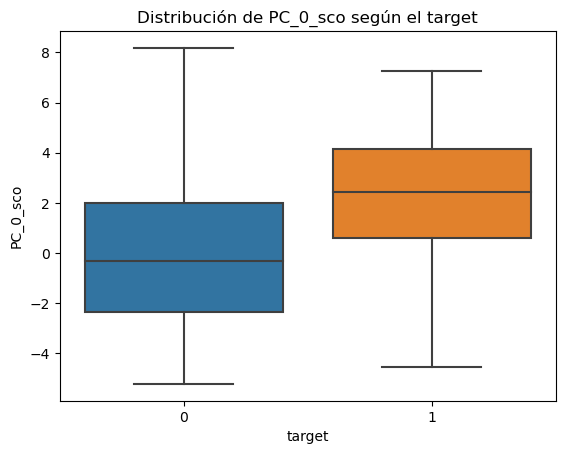

In [465]:
# Visualmente 
plt.figure()
sns.boxplot(data = df,
            x = 'target',
            y = 'PC_0_sco', 
            showfliers = False)
plt.title('Distribución de PC_0_sco según el target')
plt.show()

**Variables nse_perc y lc_monto** 

<Axes: >

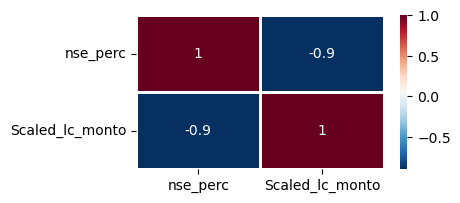

In [466]:
# Matriz de correlacion
matriz_corr = df[['nse_perc','Scaled_lc_monto']].corr()
fig, ax = plt.subplots(figsize=(4, 2))
sns.heatmap(round(matriz_corr,1), annot=True,
            cmap = 'RdBu_r',            
            lw = 1)

In [467]:
# Genero el arbol
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df[['nse_perc','Scaled_lc_monto']].values
y = df['target'].values

weight = 0.97 / 0.03

arbol = DecisionTreeClassifier(max_depth = 3,
                               min_samples_split = round(0.4 * df.shape[0]),
                               min_samples_leaf = round(0.1 * df.shape[0]),
                               random_state = 44,
                               criterion = 'entropy',
                               class_weight = {1: weight})
arbol.fit(X, y)

y_pred = arbol.predict(X)
nodos_terminales = arbol.apply(X)


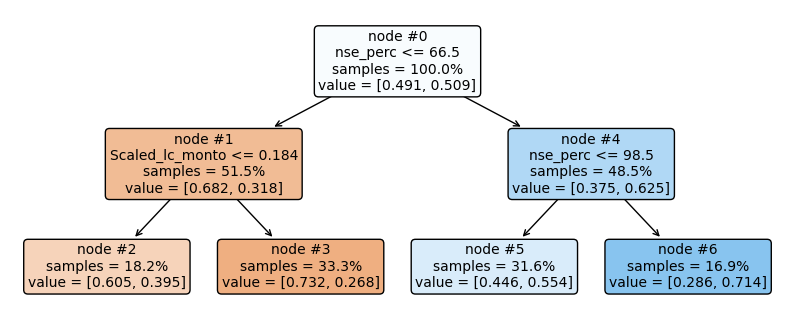

In [468]:
# Visualmente
plt.figure(figsize=(10,4))
plot_tree(arbol, 
          filled = True, 
          rounded = True, 
          feature_names = ['nse_perc','Scaled_lc_monto'], 
          impurity = False,
          proportion = True,
          node_ids = True,
          fontsize = 10);

In [469]:
# Evaluando diferencias entre nodos
df_arbol = pd.DataFrame({'Prediccion': y_pred, 'Nodo': nodos_terminales})
df_arbol['target'] = df['target']
df_arbol['nse_perc'] = df['nse_perc']
df_arbol['Scaled_lc_monto'] = df['Scaled_lc_monto']

resultados = df_arbol.groupby('Nodo').agg(
    nse_perc_min = ('nse_perc', 'min'),
    nse_perc_max = ('nse_perc', 'max'),
    lc_monto_min = ('Scaled_lc_monto', 'min'),
    lc_monto_max = ('Scaled_lc_monto', 'max'),
    Cant = ('target', 'count'),
    Tasa_Morosos = ('target', 'mean')
).reset_index()
resultados

,Nodo,nse_perc_min,nse_perc_max,lc_monto_min,lc_monto_max,Cant,Tasa_Morosos
0,2,0,66,-1.23,0.18,1465,0.02
1,3,2,57,0.18,4.00,2681,0.01
2,5,67,98,-1.23,-0.01,2545,0.04
3,6,99,100,-1.23,-0.82,1356,0.07


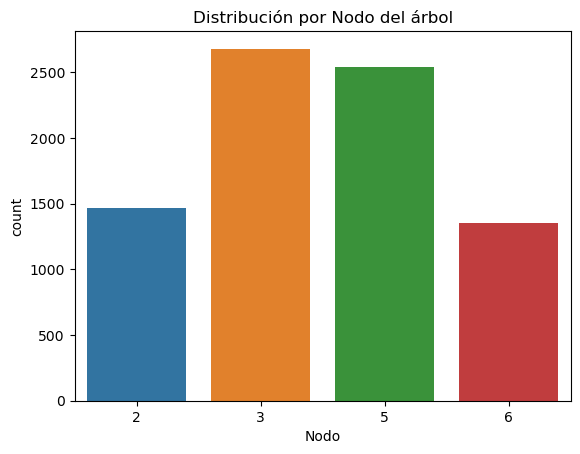

In [470]:
# Primer chequeo: volumen por categoria?
plt.figure()
order = df_arbol['Nodo'].value_counts().sort_index().index
sns.countplot(data = df_arbol,
              x = "Nodo",
              order = order)
plt.title('Distribución por Nodo del árbol')
plt.show()

Text(0.5, 1.0, 'Relación entre Nodos y Target')

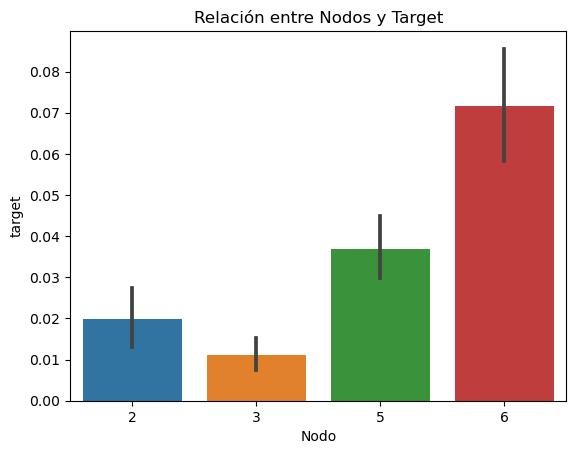

In [471]:
# Evaluemos la relación con el target
plt.figure()
sns.barplot(data = df_arbol,
            x = 'Nodo',
            y = 'target')
plt.title('Relación entre Nodos y Target')

In [472]:
# Calcular una binaria por cada nodo y eliminar nse_perc y Scaled_lc_monto
df['bin_nodo2_nse_lc_monto'] = np.where(df_arbol['Nodo'] == 2,1,0)
df['bin_nodo3_nse_lc_monto'] = np.where(df_arbol['Nodo'] == 3,1,0)
df['bin_nodo5_nse_lc_monto'] = np.where(df_arbol['Nodo'] == 5,1,0)

df = df.drop(columns = ['nse_perc','Scaled_lc_monto'], axis = 1)

### Replicación Importancia sin variables sco
Dado que todas las variables tipo "sco" fueron resumidas en PC_0_sco, se recalculará la importancia de variables pero eliminadolas del estudio. 

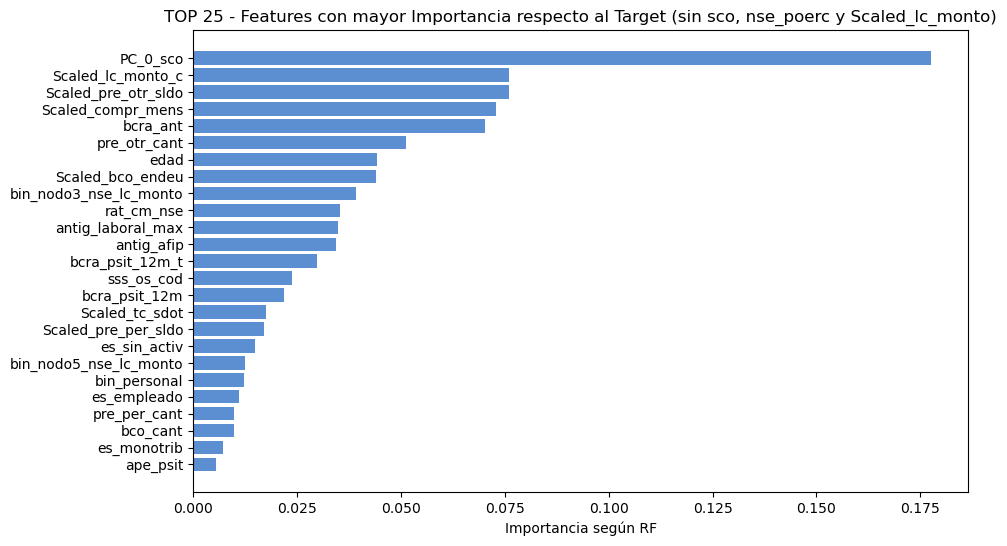

In [473]:
from sklearn.ensemble import RandomForestClassifier

features = df.drop(['target'], axis = 1).drop(variables_sco, axis = 1).columns

X = df[features].values
y = df['target'].values

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators = 150, 
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 6,
                               criterion = 'entropy') 

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Grafico la importancia de cada variable
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
importance_df = importance_df.head(25)
plt.figure(figsize=(10, 6)) 
plt.barh(importance_df['Feature'], 
         importance_df['Importance'],
         color = '#5B8FD1')
plt.xlabel('Importancia según RF')
plt.title('TOP 25 - Features con mayor Importancia respecto al Target (sin sco, nse_poerc y Scaled_lc_monto)')
plt.gca().invert_yaxis()  
plt.show() 

### **Conclusión:**
Se probarán dos modelos alternativos utilizando las 25 variables más predictivas según el resultado anterior. 

In [474]:
features_probar = importance_df['Feature'].values
features_probar

array(['PC_0_sco', 'Scaled_lc_monto_c', 'Scaled_pre_otr_sldo',
       'Scaled_compr_mens', 'bcra_ant', 'pre_otr_cant', 'edad',
       'Scaled_bco_endeu', 'bin_nodo3_nse_lc_monto', 'rat_cm_nse',
       'antig_laboral_max', 'antig_afip', 'bcra_psit_12m_t', 'sss_os_cod',
       'bcra_psit_12m', 'Scaled_tc_sdot', 'Scaled_pre_per_sldo',
       'es_sin_activ', 'bin_nodo5_nse_lc_monto', 'bin_personal',
       'es_empleado', 'pre_per_cant', 'bco_cant', 'es_monotrib',
       'ape_psit'], dtype=object)

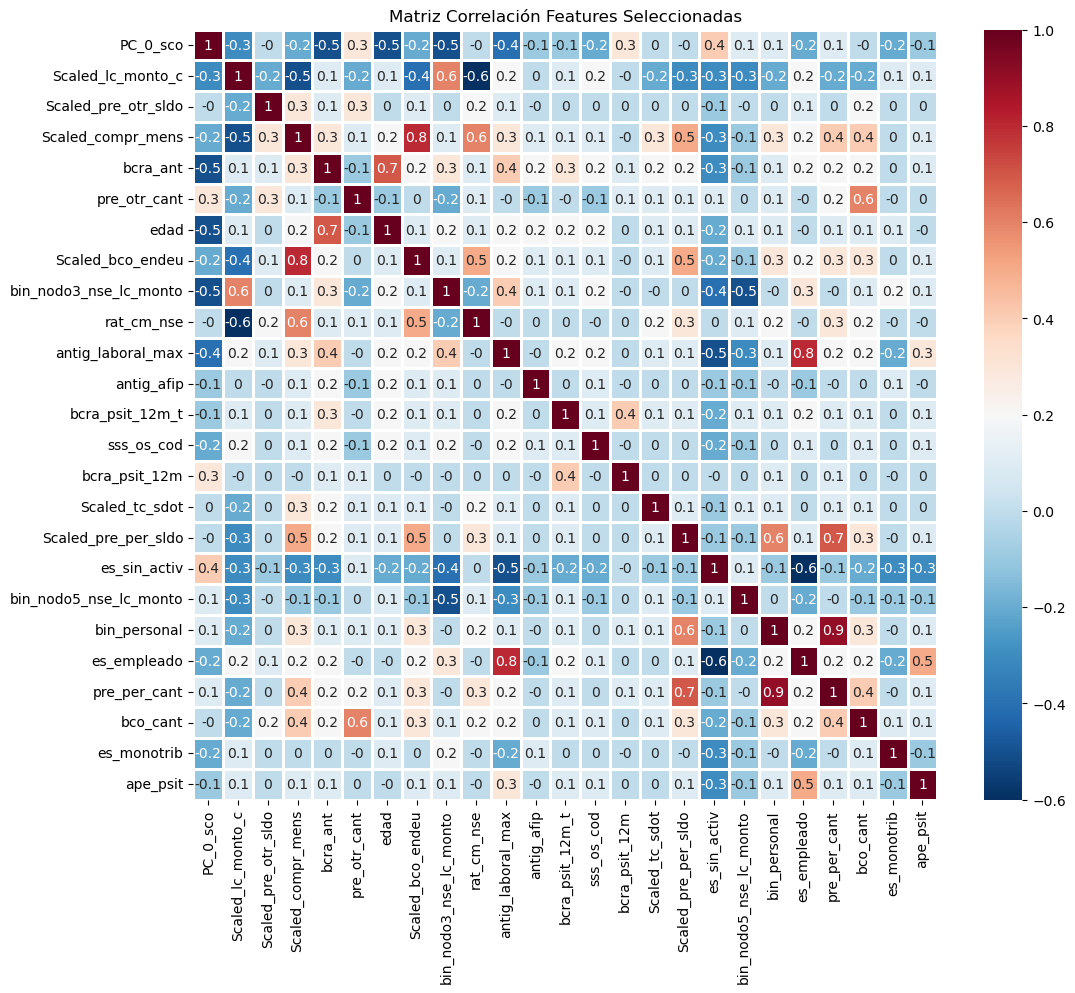

In [475]:
# Matriz de correlacion
matriz_corr = df[features_probar].corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(round(matriz_corr,1), annot=True,
            cmap = 'RdBu_r',            
            lw = 1)
plt.title('Matriz Correlación Features Seleccionadas')
plt.show()

### Selección entre variables con mucha correlación:
Evaluando las variables de mayor a menor importancia, se eliminaran aquellas con un coeficiente de correlación absoluto mayor a 0.7. 
* **bcra_ant:** Se elimina edad.
* **Scaled_compr_mens:** Se elimina Scaled_bco_endeu.
* **antig_laboral_max:** Se elimina es_empleado.
* **Scaled_pre_per_sido:** Se elimina pre_per_cant.
* **bin_personal:** Se elimina pre_per_cant.


In [476]:
eliminar_alta_corr = ['edad','Scaled_bco_endeu','es_empleado','pre_per_cant']
features = [feature for feature in features_probar if feature not in eliminar_alta_corr]

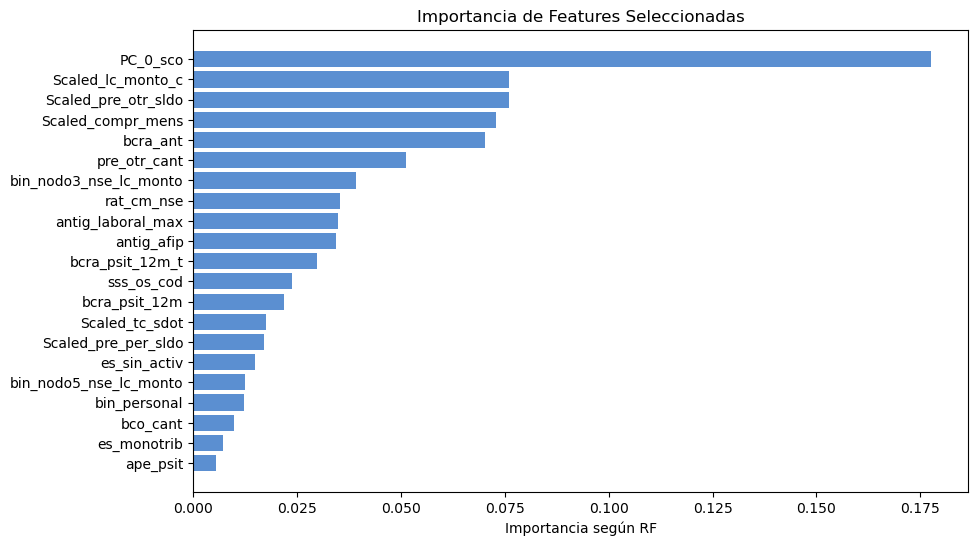

In [477]:
# Grafico la importancia de cada variable
importance_df = importance_df.loc[importance_df['Feature'].isin(features),]
plt.figure(figsize=(10, 6)) 
plt.barh(importance_df['Feature'], 
         importance_df['Importance'],
         color = '#5B8FD1')
plt.xlabel('Importancia según RF')
plt.title('Importancia de Features Seleccionadas')
plt.gca().invert_yaxis()  
plt.show() 

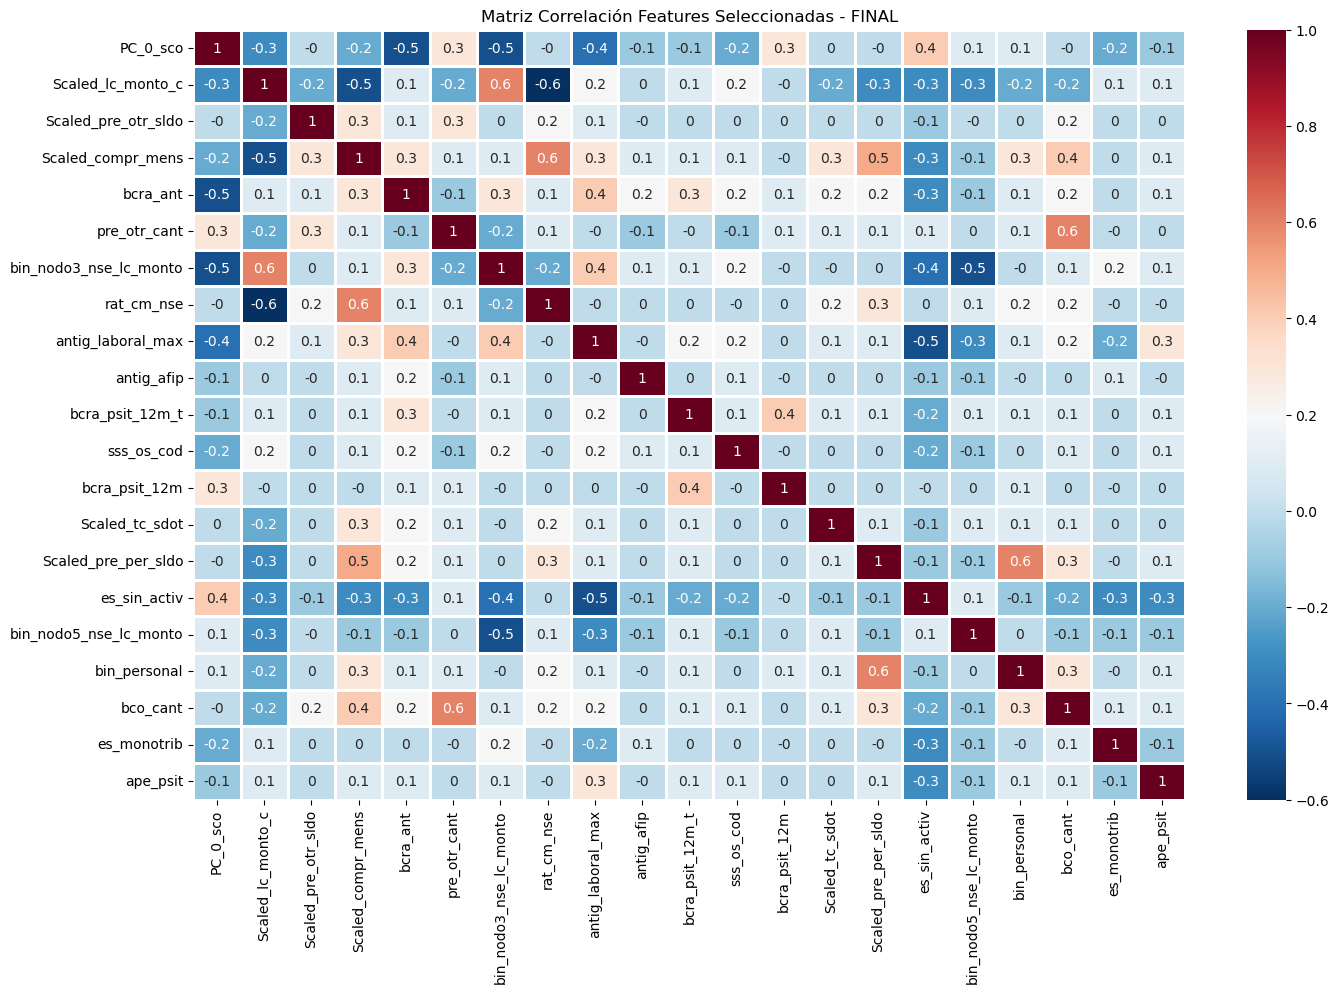

In [478]:
# Matriz de correlacion final
matriz_corr = df[features].corr()
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(round(matriz_corr,1), annot=True,
            cmap = 'RdBu_r',            
            lw = 1)
plt.title('Matriz Correlación Features Seleccionadas - FINAL')
plt.show()

# **3. Elección del algoritmo**
Antes de comenzar a probar distintas alternativas, se separará el total de la muestra en dos porciones aleatorias: 30% del total de registros será destinado a la muestra de Test, y el resto a la muestra de Train. 
<br>


In [479]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,
                                    test_size = 0.30, 
                                    random_state = 12)

In [480]:
# Check tasas similares 
print('Cantidad Registros TRAIN:')
print(df_train.shape[0])
print('Tasa Morosos TRAIN:')
print(round(df_train['target'].mean()*100,2),'%')
print('')
print('Cantidad Registros TEST:')
print(df_test.shape[0])
print('Tasa Morosos TEST:')
print(round(df_test['target'].mean()*100,2),'%')

Cantidad Registros TRAIN:
5632
Tasa Morosos TRAIN:
3.07 %

Cantidad Registros TEST:
2415
Tasa Morosos TEST:
3.19 %


In [481]:
# Calculo diccionario de pesos por desbalanceo de clases
class_weight = {0: 1, 1: 0.97/0.03}

## **Modelo 1: Regresión Logística**
Para encontrar la mejor estimación posible, se recorrerán varias alternativas de hiperparámetros y se seleccionará aquella que genere mayor AUC. 

In [482]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train = df_train[features].values
y_train = df_train['target'].values
X_test = df_test[features].values
y_test = df_test['target'].values

# Definimos los parámetros de búsqueda
param_grid = {
    'fit_intercept' : [True,False],
    'penalty': ['l1', 'l2','elasticnet','none'],
    'C':[0.01, 0.05, 0.1, 0.5, 1, 5],
    'max_iter':[50,100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Modelo
reg_log_1 = LogisticRegression(class_weight=class_weight)

# Crear objeto GridSearchCV
grid_search = GridSearchCV(estimator = reg_log_1, 
                           param_grid = param_grid, 
                           cv = 4, 
                           scoring = 'roc_auc')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print('')

# Mostrar la mejor puntuación (exactitud en este caso)
print("Mejor auc de validación cruzada:", round(grid_search.best_score_,4))

Mejores hiperparámetros: {'C': 0.01, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

Mejor auc de validación cruzada: 0.7335


In [502]:
# Ejecuto modelo con hiperparámetros ganadores
# Genero y entreno
reg_log_1 = LogisticRegression(C = 0.01,
                               fit_intercept = True,
                               max_iter = 50,
                               penalty = 'l2',
                               solver = 'liblinear',
                               class_weight=class_weight)
reg_log_1.fit(X_train, y_train)

# Predicciones
y_pred_train_1 = reg_log_1.predict(X_train)
y_pred_test_1 = reg_log_1.predict(X_test)
y_pred_prob_train_1 = reg_log_1.predict_proba(X_train)[:,1]
y_pred_prob_test_1 = reg_log_1.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Distribución Estimaciones TEST')

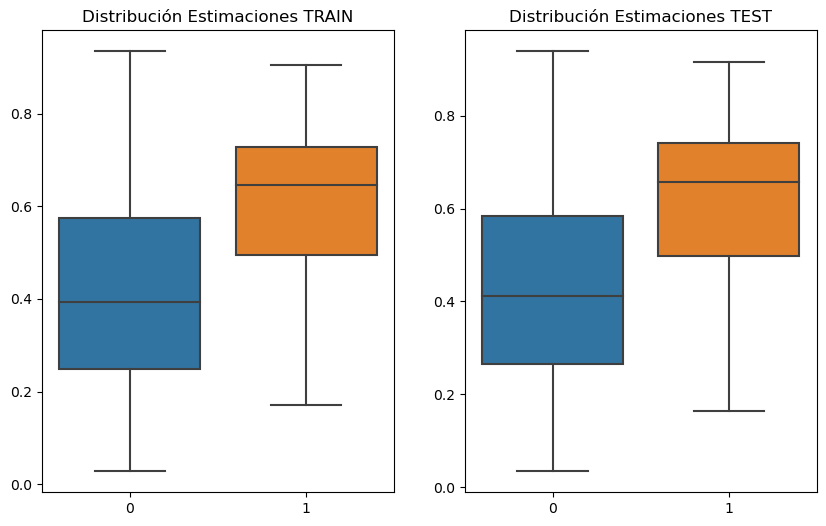

In [503]:
# Distribuciones de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.boxplot(data = df,
            x = y_train,
            y = y_pred_prob_train_1, 
            showfliers = False)
plt.title('Distribución Estimaciones TRAIN')
plt.subplot(122)
sns.boxplot(data = df,
            x = y_test,
            y = y_pred_prob_test_1, 
            showfliers = False)
plt.title('Distribución Estimaciones TEST')

## **Modelo 2: Random Forest**
A los efectos de entrenar este modelo, se realizará un proceso de optimización de hiperparámetros para encontrar la combinación de hiperparámetros que genera mejores métricas. 

In [485]:
# Definimos los parámetros de búsqueda
param_grid = {
    'n_estimators': [100, 150], 
    'max_depth': [5, 6, 7],
    'min_samples_leaf': [100,150],
    'max_features': [4,5,6,7]
}


# Modelo
rf_1 = RandomForestClassifier(random_state = 123, class_weight = class_weight)

# Crear objeto GridSearchCV
grid_search = GridSearchCV(estimator = rf_1, 
                           param_grid = param_grid, 
                           cv = 4, 
                           scoring = 'roc_auc')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print('')

# Mostrar la mejor puntuación (exactitud en este caso)
print("Mejor AUC de validación cruzada:", round(grid_search.best_score_,4))

Mejores hiperparámetros: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 100, 'n_estimators': 100}

Mejor AUC de validación cruzada: 0.733


In [504]:
# Genero y entreno
rf_1 = RandomForestClassifier(n_estimators = 100, 
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 5,
                               class_weight = class_weight) 
rf_1.fit(X_train, y_train)

# Predicciones
y_pred_train_2 = rf_1.predict(X_train)
y_pred_test_2 = rf_1.predict(X_test)
y_pred_prob_train_2 = rf_1.predict_proba(X_train)[:,1]
y_pred_prob_test_2 = rf_1.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Distribución Estimaciones TEST')

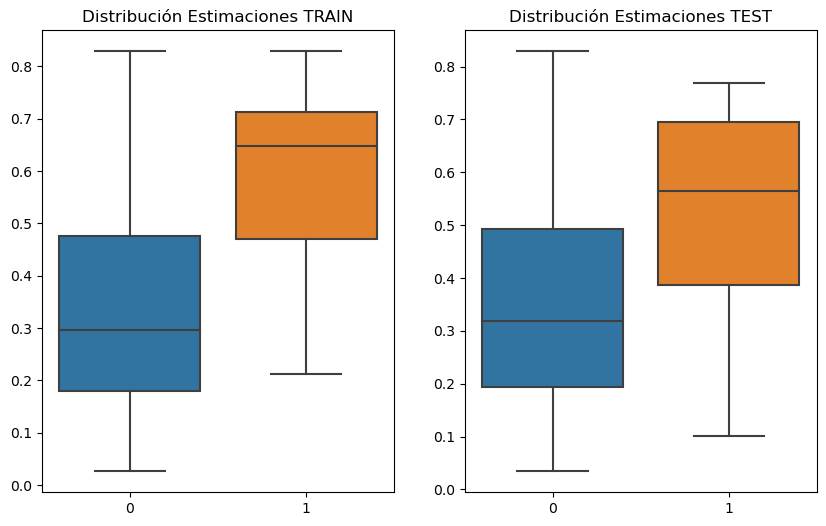

In [505]:
# Distribuciones de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.boxplot(data = df,
            x = y_train,
            y = y_pred_prob_train_2, 
            showfliers = False)
plt.title('Distribución Estimaciones TRAIN')
plt.subplot(122)
sns.boxplot(data = df,
            x = y_test,
            y = y_pred_prob_test_2, 
            showfliers = False)
plt.title('Distribución Estimaciones TEST')

# **4. Validación de los modelos**
Para validar los dos modelos desarrollados se analizaran 3 conceptos:  
<br>

1. **Poder de Ordenamiento**: Segmentando las predicciones en quintiles, se evaluará si existe una tendencia monótona en las predicciones respecto de la tasa de morosidad.  
2. **ROC y AUC**: Se evaluará el AUC en TRAIN y TEST, intentando seleccionar el modelo que mantenga métricas similares en ambas muestras.
3. **Matriz de Confusión, Recall y Accuracy**: Se generará la matriz de confusión y se evaluará qué tan buena resultó la clasificación con ambos modelos. Se prestará especial atención a las métricas Recall y Accuracy, teniendo en cuenta el desbalance en el target. 

## **Poder de Ordenamiento**

In [488]:
# Poder de ordenamiento

# RegLog

# Agrego predicción en mi dataframes
df_train['Predict_Prob_RegLog'] = y_pred_prob_train_1
df_test['Predict_Prob_RegLog'] = y_pred_prob_test_1

# Quintiles
quintiles = np.percentile(df_train['Predict_Prob_RegLog'], [20, 40, 60, 80])
df_train['Predict_RegLog_Bin'] = np.digitize(df_train['Predict_Prob_RegLog'], quintiles)

quintiles = np.percentile(df_test['Predict_Prob_RegLog'], [20, 40, 60, 80])
df_test['Predict_RegLog_Bin'] = np.digitize(df_test['Predict_Prob_RegLog'], quintiles)


# Genero agrupaciones
resultados_nodo_TRAIN = df_train.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),        
    Tasa_Mor = ('target', 'mean')    
).reset_index()

resultados_nodo_TEST = df_test.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),   
    Tasa_Mor = ('target', 'mean')    
).reset_index()

# RF

# Agrego predicción en mi dataframes
df_train['Predict_Prob_RF'] = y_pred_prob_train_2
df_test['Predict_Prob_RF'] = y_pred_prob_test_2

# Quintiles
quintiles = np.percentile(df_train['Predict_Prob_RF'], [20, 40, 60, 80])
df_train['Predict_RF_Bin'] = np.digitize(df_train['Predict_Prob_RF'], quintiles)

quintiles = np.percentile(df_test['Predict_Prob_RF'], [20, 40, 60, 80])
df_test['Predict_RF_Bin'] = np.digitize(df_test['Predict_Prob_RF'], quintiles)


# Genero agrupaciones
resultados_nodo_TRAIN_RF = df_train.groupby('Predict_RF_Bin').agg(     
    Cant = ('Predict_RF_Bin', 'count'),        
    Tasa_Mor = ('target', 'mean')    
).reset_index()

resultados_nodo_TEST_RF = df_test.groupby('Predict_RF_Bin').agg(     
    Cant = ('Predict_RF_Bin', 'count'),   
    Tasa_Mor = ('target', 'mean')    
).reset_index()

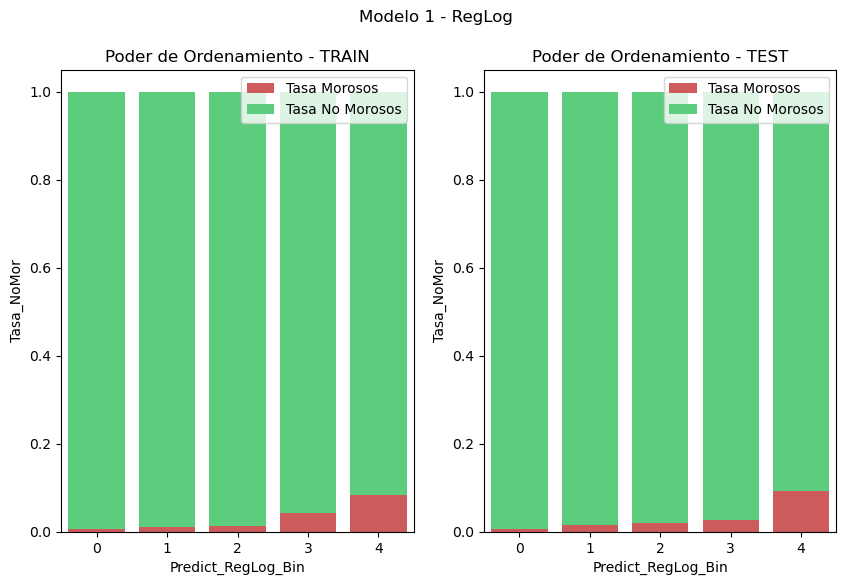

In [489]:
# Barplot por quintil - RegLog
resultados_nodo_TRAIN['Tasa_NoMor'] = (1 - resultados_nodo_TRAIN['Tasa_Mor'])
resultados_nodo_TEST['Tasa_NoMor'] = (1 - resultados_nodo_TEST['Tasa_Mor'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Mor', 
            label = 'Tasa Morosos',
            color = '#E04848')
sns.barplot(data=resultados_nodo_TRAIN, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoMor', 
            bottom=resultados_nodo_TRAIN['Tasa_Mor'], 
            label = 'Tasa No Morosos',
            color = '#48E074')
plt.title('Poder de Ordenamiento - TRAIN')
plt.legend()

plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Mor', 
            label = 'Tasa Morosos',
            color = '#E04848')
sns.barplot(data=resultados_nodo_TEST, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoMor', 
            bottom=resultados_nodo_TEST['Tasa_Mor'], 
            label = 'Tasa No Morosos',
            color = '#48E074')
plt.title('Poder de Ordenamiento - TEST')
plt.legend()

plt.suptitle('Modelo 1 - RegLog')

plt.show()

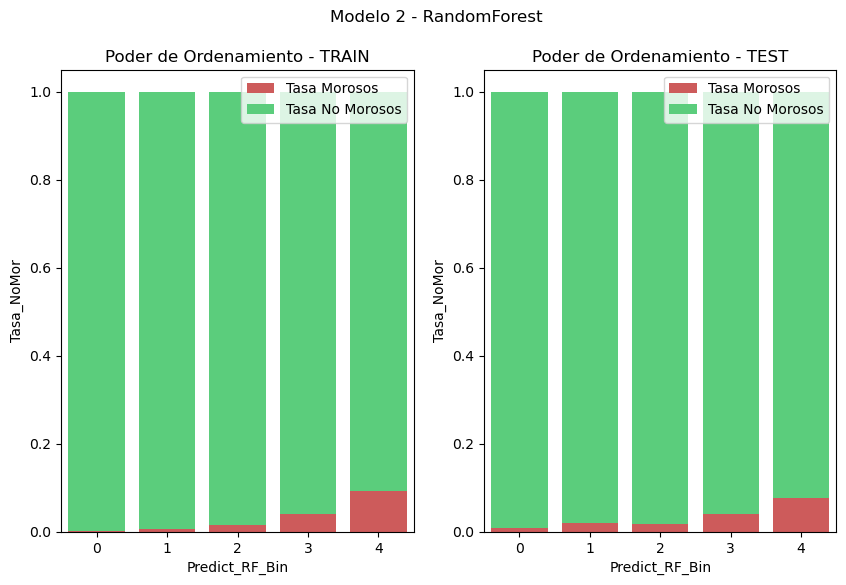

In [490]:
# Barplot por quintil - RegLog
resultados_nodo_TRAIN_RF['Tasa_NoMor'] = (1 - resultados_nodo_TRAIN_RF['Tasa_Mor'])
resultados_nodo_TEST_RF['Tasa_NoMor'] = (1 - resultados_nodo_TEST_RF['Tasa_Mor'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN_RF,
            x = 'Predict_RF_Bin',
            y = 'Tasa_Mor', 
            label = 'Tasa Morosos',
            color = '#E04848')
sns.barplot(data=resultados_nodo_TRAIN_RF, 
            x = 'Predict_RF_Bin', 
            y = 'Tasa_NoMor', 
            bottom=resultados_nodo_TRAIN_RF['Tasa_Mor'], 
            label = 'Tasa No Morosos',
            color = '#48E074')
plt.title('Poder de Ordenamiento - TRAIN')
plt.legend()

plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST_RF,
            x = 'Predict_RF_Bin',
            y = 'Tasa_Mor', 
            label = 'Tasa Morosos',
            color = '#E04848')
sns.barplot(data=resultados_nodo_TEST_RF, 
            x = 'Predict_RF_Bin', 
            y = 'Tasa_NoMor', 
            bottom=resultados_nodo_TEST_RF['Tasa_Mor'], 
            label = 'Tasa No Morosos',
            color = '#48E074')
plt.title('Poder de Ordenamiento - TEST')
plt.legend()

plt.suptitle('Modelo 2 - RandomForest')

plt.show()

## **ROC Y AUC**

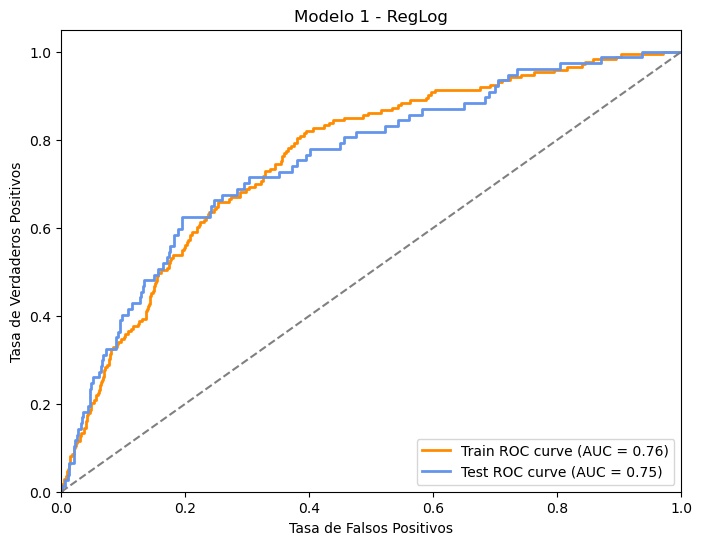

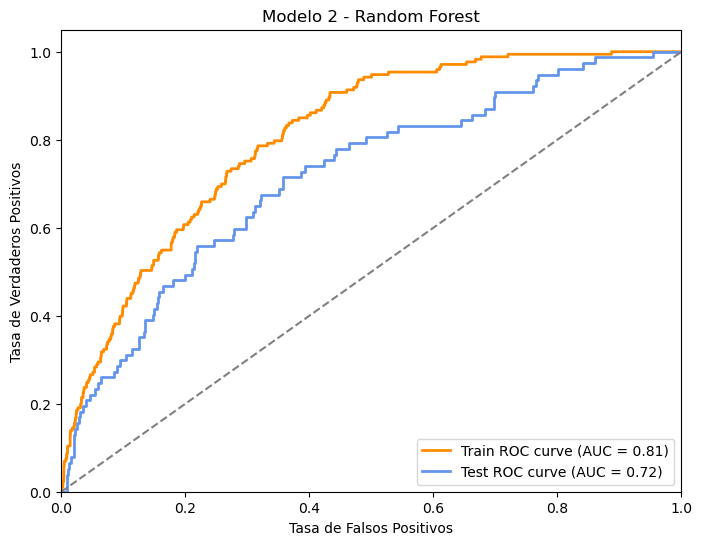

In [491]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report,recall_score, f1_score


# RegLog
y_train = y_train
y_train_proba = y_pred_prob_train_1
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test_1
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_1 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Modelo 1 - RegLog')
plt.legend(loc='lower right')



# RF
y_train = y_train
y_train_proba = y_pred_prob_train_2
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test_2
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_2 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Modelo 2 - Random Forest')
plt.legend(loc='lower right')

plt.show()

## **Matrices de confusión**

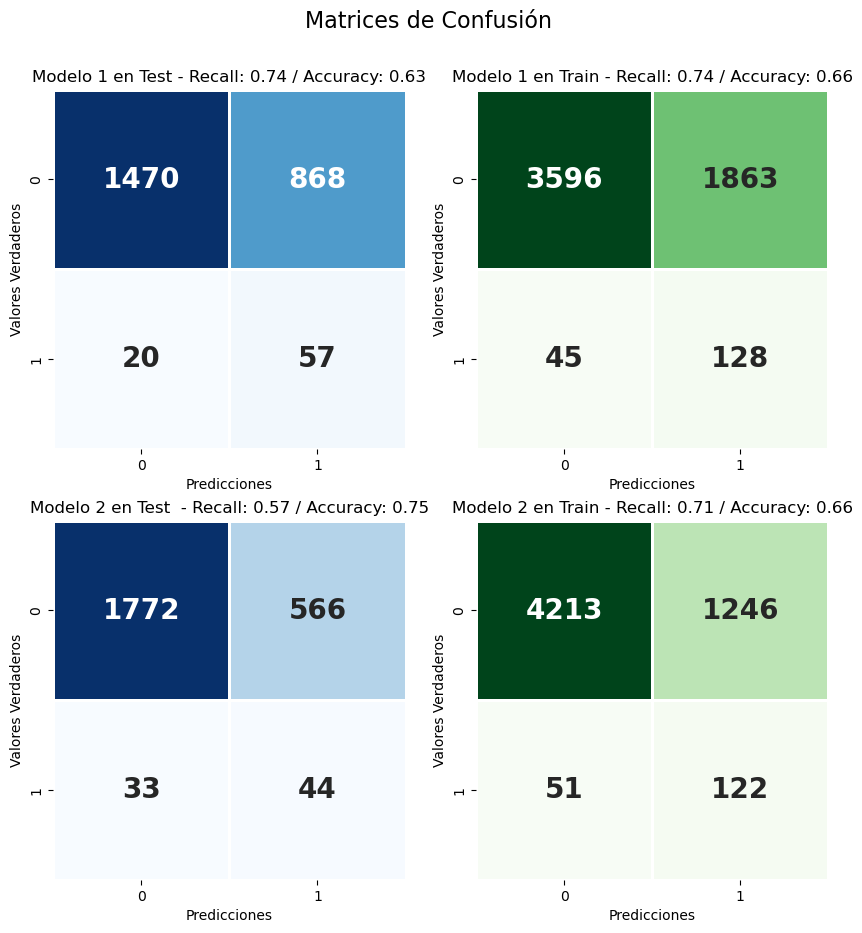

In [511]:
# Matrices de confusión

conf_matrix_rg1_test = confusion_matrix(y_test, y_pred_test_1)
conf_matrix_rg1_train = confusion_matrix(y_train, y_pred_train_1)
recall_rg1_test = round(recall_score(y_test, y_pred_test_1),2)
recall_rg1_train = round(recall_score(y_train, y_pred_train_1),2)
accurancy_rg1_test = round(accuracy_score(y_test, y_pred_test_1),2)
accurancy_rg1_train = round(accuracy_score(y_train, y_pred_train_1),2)

conf_matrix_rg2_test = confusion_matrix(y_test, y_pred_test_2)
conf_matrix_rg2_train = confusion_matrix(y_train, y_pred_train_2)
recall_rg2_test = round(recall_score(y_test, y_pred_test_2),2)
recall_rg2_train = round(recall_score(y_train, y_pred_train_2),2)
accurancy_rg2_test = round(accuracy_score(y_test, y_pred_test_2),2)
accurancy_rg2_train = round(accuracy_score(y_train, y_pred_train_2),2)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

annot_kws = {"size": 20, "weight": "bold"}

sns.heatmap(conf_matrix_rg1_test, 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            linewidths = 2,
            ax = axs[0,0],
            cbar=False,
            annot_kws=annot_kws)
axs[0,0].set_title('Modelo 1 en Test - Recall: '+str(recall_rg1_test) + ' / Accuracy: ' + str(accurancy_rg1_test))
axs[0,0].set_xlabel('Predicciones')
axs[0,0].set_ylabel('Valores Verdaderos')

sns.heatmap(conf_matrix_rg1_train, 
            annot=True, 
            fmt="d", 
            cmap="Greens",
            linewidths = 2,
            ax = axs[0,1],
            cbar=False,
            annot_kws=annot_kws)
axs[0,1].set_title('Modelo 1 en Train - Recall: '+ str(recall_rg1_train) + ' / Accuracy: ' + str(accurancy_rg1_train))
axs[0,1].set_xlabel('Predicciones')
axs[0,1].set_ylabel('Valores Verdaderos')



sns.heatmap(conf_matrix_rg2_test, 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            linewidths = 2,
            ax = axs[1,0],
            cbar=False,
            annot_kws=annot_kws)
axs[1,0].set_title('Modelo 2 en Test  - Recall: '+ str(recall_rg2_test) + ' / Accuracy: ' + str(accurancy_rg2_test))
axs[1,0].set_xlabel('Predicciones')
axs[1,0].set_ylabel('Valores Verdaderos')

sns.heatmap(conf_matrix_rg2_train, 
            annot=True, 
            fmt="d", 
            cmap="Greens",
            linewidths = 2,
            ax = axs[1,1],
            cbar=False,
            annot_kws=annot_kws)
axs[1,1].set_title('Modelo 2 en Train - Recall: '+ str(recall_rg2_train) + ' / Accuracy: ' + str(accurancy_rg1_train))
axs[1,1].set_xlabel('Predicciones')
axs[1,1].set_ylabel('Valores Verdaderos')

plt.suptitle('Matrices de Confusión', fontsize=16)
plt.subplots_adjust(top=0.9) 

plt.show()


# **5. Prueba de estrés al modelo ganador**
A continuación se efectúan las pruebas de estrés al modelo ganador: **Modelo 1 - Regresión Logística.**
<br>

## **5.1. Bootstrapping:**  
Se tomarán 1000 muestras aleatorias con reposición utilizando la muestra de test, cada una de aproximadamente un 35% del total cada una (845 regsistros aprox.), y se calculará AUC, Recall y Accuracy en cada muestra a los efectos de generar una distribución de las métricas y evaluar qué tan estables son. Esto con el objetivo de validar que la varianza del modelo se encuentra controlada. 

In [493]:
# Bootstrapping
cantidad = round(df_test.shape[0] * 0.35)
cant_muestras = 1000

# Genero diccionario a completar
metricas_boots = {'recall': [], 'accurancy': [], 'auc': []}

for i in range(1,cant_muestras):

    df_test_desordeno = df_test.sample(frac=1)
    df_test_desordeno = df_test_desordeno.head(cantidad)

    y = df_test_desordeno['target'].values
    y_pred_proba = df_test_desordeno['Predict_Prob_RegLog'].values
    y_pred = np.where(y_pred_proba > 0.5,1,0)

    recall_boots = recall_score(y, y_pred)
    accurancy_boots = accuracy_score(y, y_pred)
    fpr_test, tpr_test, _ = roc_curve(y, y_pred_proba)
    roc_auc_boots = auc(fpr_test, tpr_test)

    metricas_boots['recall'].append(recall_boots)
    metricas_boots['accurancy'].append(accurancy_boots)
    metricas_boots['auc'].append(roc_auc_boots)

In [494]:
metricas_boots = pd.DataFrame(metricas_boots)

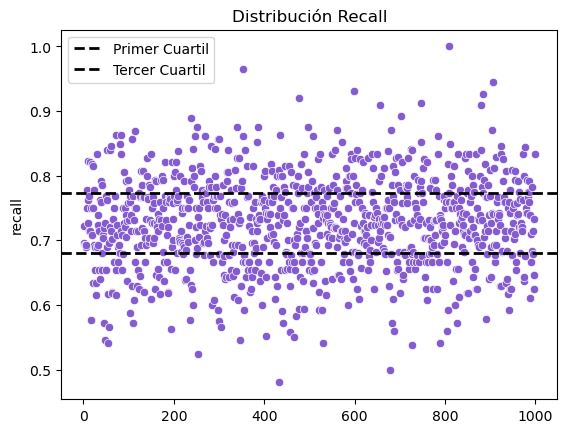

In [495]:
# Distribución recall
primer_cuartil = metricas_boots['recall'].quantile(0.25)
tercer_cuartil = metricas_boots['recall'].quantile(0.75)

sns.scatterplot(data = metricas_boots,
                y =  'recall',
                x = range(1,cant_muestras),
                color = '#845BD1')

plt.axhline(y = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
plt.axhline(y = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.title('Distribución Recall')
plt.legend()

plt.show()

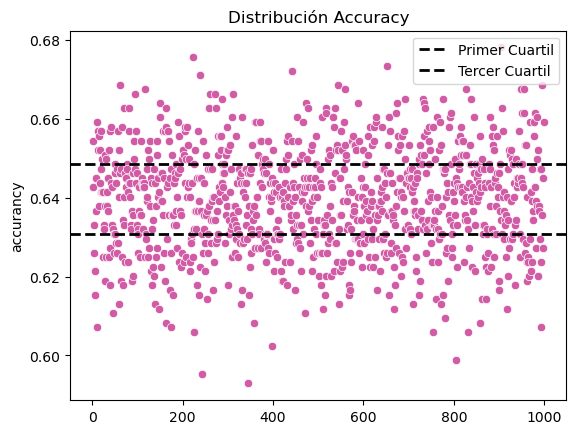

In [496]:
# Distribución accurancy
primer_cuartil = metricas_boots['accurancy'].quantile(0.25)
tercer_cuartil = metricas_boots['accurancy'].quantile(0.75)

sns.scatterplot(data = metricas_boots,
                y =  'accurancy',
                x = range(1,cant_muestras),
                color = '#D15BA4')

plt.axhline(y = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
plt.axhline(y = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.title('Distribución Accuracy')
plt.legend()

plt.show()

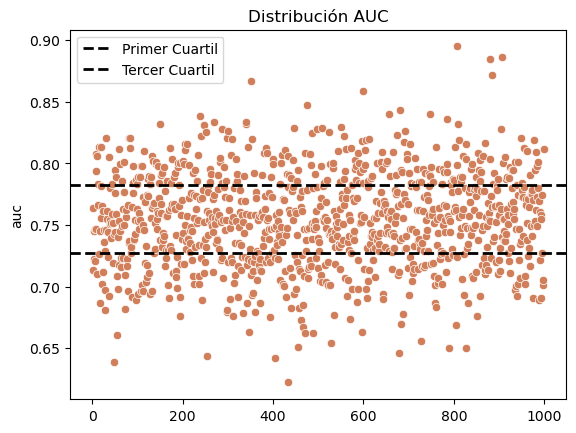

In [497]:
# Distribuxción AUC
primer_cuartil = metricas_boots['auc'].quantile(0.25)
tercer_cuartil = metricas_boots['auc'].quantile(0.75)

sns.scatterplot(data = metricas_boots,
                y =  'auc',
                x = range(1,cant_muestras),
                color = '#D17F5B')

plt.axhline(y = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
plt.axhline(y = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.title('Distribución AUC')
plt.legend()

plt.show()

In [498]:
# Medidas de Agregación

recall_media = metricas_boots['recall'].mean()
recall_desvio = metricas_boots['recall'].std()
recall_cv = recall_desvio / recall_media

accurancy_media = metricas_boots['accurancy'].mean()
accurancy_desvio = metricas_boots['accurancy'].std()
accurancy_cv = accurancy_desvio / accurancy_media

auc_media = metricas_boots['auc'].mean()
auc_desvio = metricas_boots['auc'].std()
auc_cv = auc_desvio / auc_media

print('Recall Promedio: ', round(recall_media,4))
print('Recall Coef. Variac.: ', round(recall_cv,4))
print('')
print('Accuracy Promedio: ', round(accurancy_media,4))
print('Accuracy Coef. Variac.: ', round(accurancy_cv,4))
print('')
print('AUC Promedio: ', round(auc_media,4))
print('AUC Coef. Variac.: ', round(auc_cv,4))
print('')

Recall Promedio:  0.7268
Recall Coef. Variac.:  0.097

Accuracy Promedio:  0.6393
Accuracy Coef. Variac.:  0.0205

AUC Promedio:  0.7539
AUC Coef. Variac.:  0.0517



## **5.2. K-Folds Validation:**  
Se realizará un análisis de K-Folds para evaluar Bias y Varianza. Se utilizará un **k = 6**.

In [499]:
# Librerias
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, roc_auc_score


# Crear el modelo
model = LogisticRegression(C = 0.01,
                           fit_intercept = True,
                           max_iter = 50,
                           penalty = 'l1',
                           solver = 'liblinear',
                           class_weight=class_weight)

k_elegido = 6
scorings = ['recall','roc_auc','accuracy']
scores_df = pd.DataFrame({'K_orden': range(1,k_elegido+1)})

for metrica in scorings:
    scores = cross_val_score(model, X_train, y_train, cv=k_elegido, scoring=metrica)
    scores_df[metrica] = scores

scores_df



,K_orden,recall,roc_auc,accuracy
0,1,0.76,0.70,0.63
1,2,0.76,0.75,0.64
2,3,0.59,0.65,0.65
3,4,0.76,0.75,0.67
4,5,0.75,0.76,0.64
5,6,0.72,0.78,0.67


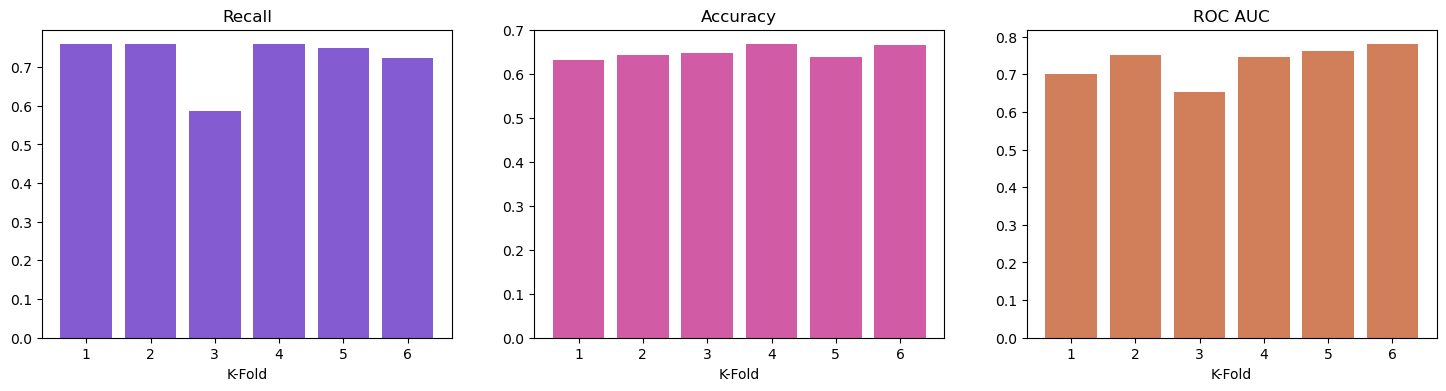

In [506]:
# Visualmente
plt.figure(figsize=(18,4)) 
plt.subplot(131)
plt.bar(scores_df['K_orden'], scores_df['recall'], color = '#845BD1')
plt.title('Recall')
plt.xlabel('K-Fold')
plt.subplot(132)
plt.bar(scores_df['K_orden'], scores_df['accuracy'], color = '#D15BA4')
plt.title('Accuracy')
plt.xlabel('K-Fold')
plt.subplot(133)
plt.bar(scores_df['K_orden'], scores_df['roc_auc'],color = '#D17F5B')
plt.title('ROC AUC')
plt.xlabel('K-Fold')

plt.show()

In [501]:
# Medidas de Agregación

recall_media = scores_df['recall'].mean()
recall_desvio = scores_df['recall'].std()
recall_cv = recall_desvio / recall_media

accurancy_media = scores_df['accuracy'].mean()
accurancy_desvio = scores_df['accuracy'].std()
accurancy_cv = accurancy_desvio / accurancy_media

auc_media = scores_df['roc_auc'].mean()
auc_desvio = scores_df['roc_auc'].std()
auc_cv = auc_desvio / auc_media

print('Recall Promedio: ', round(recall_media,4))
print('Recall Coef. Variac.: ', round(recall_cv,4))
print('')
print('Accuracy Promedio: ', round(accurancy_media,4))
print('Accuracy Coef. Variac.: ', round(accurancy_cv,4))
print('')
print('AUC Promedio: ', round(auc_media,4))
print('AUC Coef. Variac.: ', round(auc_cv,4))
print('')

Recall Promedio:  0.7227
Recall Coef. Variac.:  0.0944

Accuracy Promedio:  0.6495
Accuracy Coef. Variac.:  0.0219

AUC Promedio:  0.7323
AUC Coef. Variac.:  0.0639



### Conclusión: 
* Las métricas promedio obtenidas en el análisis de bootstrapping y k-fold validation son similares entre sí, y similares respecto de lo obtenido en muestra de test. Esto significa que en cuanto al sesgo podemos asegurar que se obtuvo estabilidad en las métricas. 

* El coeficiente de variación de cada métrica en ambos análisis se mantiene por debajo de 0.2, por lo que podemos asumir que las métricas son homogéneas en cada submuestra calculada. Esto significa que el modelo es capaz de generalizar y cuenta con varianza controlada. 

# **5. Próximos pasos**
* **Feature Engineering:** Podrían generarse algunas transformaciones adicionales, e intentar sumar un poco más de ingeniería de variables a través de features binarias, logaritmocas, cocientes, relaciones lineales, agrupaciones con clusters, relaciones no lineales con árboles de decisión. 
<br></br>

* **Algoritmos alternativos:** Podrían probarse algunos algoritmos que no se han testeado en este trabajo, como SPV o XGBoost. 
<br></br>

* **Implementación**: Una vez seleccionado el modelo ganador, deberá evaluarse: 
    1. Complejidad de la implementación: Priorizar modelos simples pero sin descuidar el poder predictivo y de generalización. 
    2. Forma de consumo del modelo: Evaluar cómo el cliente necesita acceder al resultado de la predicción (API? BATCH?)
    3. Sistema de monitoreo: Debe desarrollarse un sistema de captura de datos y reportería que permitan monitorear la performance del modelo a través del tiempo, y la estabilidad de las variables. 

    <br></br>